In [1]:
import csv
import random
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def csv_to_kvs(fileName):
    make_dictionary = {}
    with open(fileName,'r') as csvFile:
        csvreader = csv.reader(csvFile)
        for row in csvreader:
            #position 1 and following are integers
            make_dictionary[row[0]] = [int(val) for val in row[1:]]
        print(make_dictionary)
    return make_dictionary

C36=csv_to_kvs('C_36all.csv')  


print(len(C36.keys()))

keysListC36 = list(C36.keys()) 
print(keysListC36)

{'123.456': [123, 253, 354, 134, 146, 456, 265, 162], '123.465': [152, 123, 134, 145, 465, 364, 263, 256], '123.546': [123, 243, 345, 135, 156, 465, 264, 162], '123.564': [154, 142, 123, 135, 365, 263, 246, 456], '123.645': [243, 123, 152, 254, 456, 165, 136, 346], '123.654': [245, 253, 123, 142, 164, 136, 356, 465], '124.356': [143, 124, 254, 345, 356, 265, 162, 136], '124.365': [152, 124, 143, 135, 365, 346, 264, 256], '124.536': [354, 145, 124, 234, 263, 162, 156, 365], '124.563': [153, 132, 124, 145, 465, 264, 236, 356], '124.635': [124, 152, 253, 234, 364, 356, 165, 146], '124.653': [124, 132, 235, 254, 456, 365, 163, 146], '125.346': [245, 354, 153, 125, 162, 136, 346, 264], '125.364': [153, 134, 142, 125, 265, 246, 364, 356], '125.436': [235, 345, 154, 125, 162, 146, 364, 263], '125.463': [154, 143, 132, 125, 265, 236, 346, 456], '125.634': [243, 235, 125, 142, 164, 156, 365, 346], '125.643': [245, 125, 132, 234, 364, 163, 156, 465], '126.345': [152, 135, 345, 254, 246, 364, 163

In [2]:
%run module2x2x2_ext_match.ipynb

from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2024-04-17


# Investigating the number of buildable cubes using sets of 12 cubes

## Functions to use:

* **RandomKCubes**(dictionary, k)  <br>
dictionary = dictionary of cubes k = set of size k <br> output: a random selection of k cubes from dictionary

* **NumberBuildable4SetTwelveCubes**(a_collection_of_ten_cubes, dictionary_possible_targets_to_build)  <br>
a_collection_of_ten_cubes is the output of RandomKCubes  <br>
output: the number of cubes in dictionary_possible_targets_to_build that are buildable with a_collection_of_nine_cubes

* **DistributionBuildNum4SetsOfTwelve**(dictionary_sets, number_samples)

In [3]:
def NumberBuildable4SetTwelveCubes(one_collection_of_twelve, dictionary_for_targets): 
    keysList_targets = list(dictionary_for_targets.keys())
    TwelveSet = one_collection_of_twelve
  
    Collections=list(it.combinations(TwelveSet, 8))
      
    current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])     

    #for each subset of 8 cubes, determine how many cubes are buildable
    for coll in Collections:
        a_solution_list=[]
            
        for j in keysList_targets:
            a_solution_list.append(CountingSolutions(CornerCountVector(coll, dictionary_for_targets[j])))
            
        newarray = np.array([w for w in a_solution_list])
        current_solution_array = current_solution_array + newarray
  
    Number_buildable_cubes = np.count_nonzero(current_solution_array)
    
    return Number_buildable_cubes

In [14]:
#Example (cont.) calculating the number of buildable cubes using a randomly selected set of 12
NumberBuildable4SetTwelveCubes(RandomKCubes(C36, 9), C36)

2

In [47]:
def DistributionBuildNum4SetsOfTwelve(dictionary_sets, number_samples):
    list_numberBuildable=[]
    for i in range(number_samples):
        twelve_set = RandomKCubes(dictionary_sets, 12)
        n = NumberBuildable4SetTwelveCubes(twelve_set, dictionary_sets)
        list_numberBuildable.append(n)
        if n>25:
            print(n, twelve_set)
         
    return list_numberBuildable

26 [[143, 234, 253, 135, 156, 265, 246, 164], [124, 152, 253, 234, 364, 356, 165, 146], [154, 142, 123, 135, 365, 263, 246, 456], [153, 134, 142, 125, 265, 246, 364, 356], [153, 354, 234, 132, 126, 246, 456, 165], [123, 243, 345, 135, 156, 465, 264, 162], [235, 153, 145, 254, 246, 164, 136, 263], [243, 123, 152, 254, 456, 165, 136, 346], [245, 125, 132, 234, 364, 163, 156, 465], [152, 135, 345, 254, 246, 364, 163, 126], [153, 132, 124, 145, 465, 264, 236, 356], [152, 124, 143, 135, 365, 346, 264, 256]]
26 [[245, 154, 135, 253, 236, 163, 146, 264], [123, 243, 345, 135, 156, 465, 264, 162], [243, 123, 152, 254, 456, 165, 136, 346], [124, 152, 253, 234, 364, 356, 165, 146], [243, 142, 154, 345, 356, 165, 126, 236], [153, 134, 142, 125, 265, 246, 364, 356], [354, 245, 142, 134, 163, 126, 256, 365], [245, 125, 132, 234, 364, 163, 156, 465], [153, 132, 124, 145, 465, 264, 236, 356], [243, 235, 125, 142, 164, 156, 365, 346], [143, 234, 253, 135, 156, 265, 246, 164], [235, 153, 145, 254, 246, 

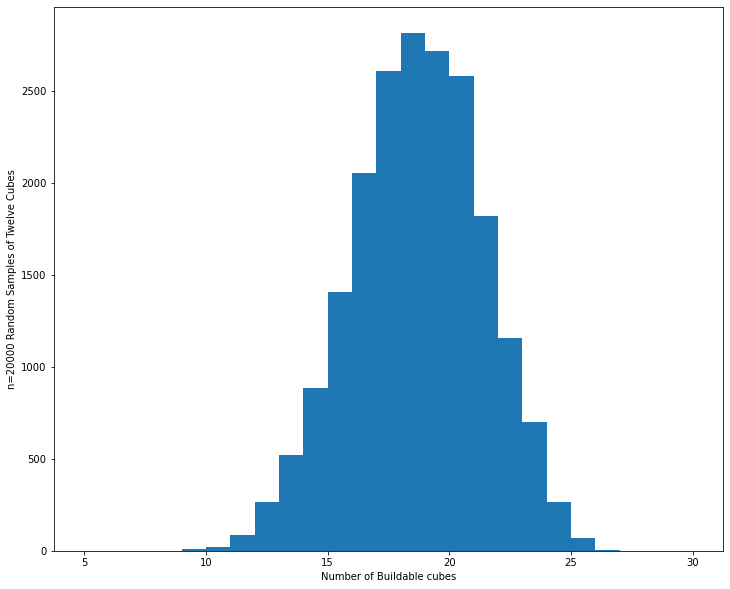

 27 :  1
 26 :  5
 25 :  72
 24 :  265
 23 :  698
 22 :  1157
 21 :  1823
 20 :  2581
 19 :  2719
 18 :  2816
 17 :  2609
 16 :  2056
 15 :  1406
 14 :  888
 13 :  523
 12 :  266
 11 :  86
 10 :  21
 9 :  8
the average number of buildable cubes is 18.20335
the standard deviation of the number of buildable cubes is 2.6889887152079175


In [48]:
#Example, distribution of the number of buildable cubes for n=20000 sets of 12 cubes
a = DistributionBuildNum4SetsOfTwelve(C36, 20000)

import statistics

#histogram
fig, ax=plt.subplots(figsize=(12,10))
ax.hist(a, bins=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
plt.xlabel("Number of Buildable cubes")
plt.ylabel("n=20000 Random Samples of Twelve Cubes")
plt.show()

CountFrequency(a)

print("the average number of buildable cubes is", statistics.mean(a))
print("the standard deviation of the number of buildable cubes is", statistics.stdev(a)) 

 25 :  20<br>
 24 :  71<br>
 23 :  202<br>
 22 :  355<br>
 21 :  551<br>
 20 :  759<br>
 19 :  799<br>
 18 :  813<br>
 17 :  787<br>
 16 :  664<br>
 15 :  462<br>
 14 :  272<br>
 13 :  147<br>
 12 :  78<br>
 11 :  12<br>
 10 :  5<br>
 9 :  3<br>
the average number of buildable cubes is 18.1705<br>
the standard deviation of the number of buildable cubes is 2.6608162420290586<br>

Sets of k=12, n=10000 random samples<br>
27 :  1<br>
 26 :  4<br>
 25 :  27<br>
 24 :  130<br>
 23 :  316<br>
 22 :  541<br>
 21 :  883<br>
 20 :  1294<br>
 19 :  1412<br>
 18 :  1339<br>
 17 :  1343<br>
 16 :  1099<br>
 15 :  708<br>
 14 :  482<br>
 13 :  230<br>
 12 :  136<br>
 11 :  48<br>
 10 :  5<br>
 9 :  2<br>
the average number of buildable cubes is 18.145<br>
the standard deviation of the number of buildable cubes is 2.6557636016842316

Sets of k=12, n=20000 random samples<br>
28 :  1<br>
 27 :  1<br>
 26 :  6<br>
 25 :  71<br>
 24 :  274<br>
 23 :  679<br>
 22 :  1132<br>
 21 :  1737<br>
 20 :  2502<br>
 19 :  2790<br>
 18 :  2747<br>
 17 :  2644<br>
 16 :  2133<br>
 15 :  1462<br>
 14 :  967<br>
 13 :  494<br>
 12 :  243<br>
 11 :  86<br>
 10 :  25<br>
 9 :  6<br>
the average number of buildable cubes is 18.1594<br>
the standard deviation of the number of buildable cubes is 2.6844835560304947

In [49]:
Sets12Build26 = [[[143, 234, 253, 135, 156, 265, 246, 164], [124, 152, 253, 234, 364, 356, 165, 146], [154, 142, 123, 135, 365, 263, 246, 456], [153, 134, 142, 125, 265, 246, 364, 356], [153, 354, 234, 132, 126, 246, 456, 165], [123, 243, 345, 135, 156, 465, 264, 162], [235, 153, 145, 254, 246, 164, 136, 263], [243, 123, 152, 254, 456, 165, 136, 346], [245, 125, 132, 234, 364, 163, 156, 465], [152, 135, 345, 254, 246, 364, 163, 126], [153, 132, 124, 145, 465, 264, 236, 356], [152, 124, 143, 135, 365, 346, 264, 256]],
[[245, 154, 135, 253, 236, 163, 146, 264], [123, 243, 345, 135, 156, 465, 264, 162], [243, 123, 152, 254, 456, 165, 136, 346], [124, 152, 253, 234, 364, 356, 165, 146], [243, 142, 154, 345, 356, 165, 126, 236], [153, 134, 142, 125, 265, 246, 364, 356], [354, 245, 142, 134, 163, 126, 256, 365], [245, 125, 132, 234, 364, 163, 156, 465], [153, 132, 124, 145, 465, 264, 236, 356], [243, 235, 125, 142, 164, 156, 365, 346], [143, 234, 253, 135, 156, 265, 246, 164], [235, 153, 145, 254, 246, 164, 136, 263]],
[[153, 235, 243, 134, 146, 264, 256, 165], [152, 145, 354, 253, 236, 346, 164, 126], [123, 253, 354, 134, 146, 456, 265, 162], [235, 153, 145, 254, 246, 164, 136, 263], [243, 254, 145, 134, 163, 156, 265, 236], [154, 143, 132, 125, 265, 236, 346, 456], [243, 142, 154, 345, 356, 165, 126, 236], [152, 124, 143, 135, 365, 346, 264, 256], [245, 154, 135, 253, 236, 163, 146, 264], [124, 152, 253, 234, 364, 356, 165, 146], [245, 125, 132, 234, 364, 163, 156, 465], [143, 124, 254, 345, 356, 265, 162, 136]],
[[154, 143, 132, 125, 265, 236, 346, 456], [152, 135, 345, 254, 246, 364, 163, 126], [245, 354, 153, 125, 162, 136, 346, 264], [153, 134, 142, 125, 265, 246, 364, 356], [143, 345, 235, 132, 126, 256, 465, 164], [245, 125, 132, 234, 364, 163, 156, 465], [243, 235, 125, 142, 164, 156, 365, 346], [143, 124, 254, 345, 356, 265, 162, 136], [153, 354, 234, 132, 126, 246, 456, 165], [235, 345, 154, 125, 162, 146, 364, 263], [152, 123, 134, 145, 465, 364, 263, 256], [123, 253, 354, 134, 146, 456, 265, 162]],
[[123, 243, 345, 135, 156, 465, 264, 162], [124, 132, 235, 254, 456, 365, 163, 146], [152, 135, 345, 254, 246, 364, 163, 126], [143, 154, 245, 234, 263, 256, 165, 136], [354, 245, 142, 134, 163, 126, 256, 365], [235, 153, 145, 254, 246, 164, 136, 263], [235, 345, 154, 125, 162, 146, 364, 263], [153, 134, 142, 125, 265, 246, 364, 356], [153, 235, 243, 134, 146, 264, 256, 165], [152, 145, 354, 253, 236, 346, 164, 126], [124, 152, 253, 234, 364, 356, 165, 146], [245, 125, 132, 234, 364, 163, 156, 465]]]
ASet12Build27 = [[243, 142, 154, 345, 356, 165, 126, 236], [143, 345, 235, 132, 126, 256, 465, 164], [143, 154, 245, 234, 263, 256, 165, 136], [143, 234, 253, 135, 156, 265, 246, 164], [235, 345, 154, 125, 162, 146, 364, 263], [235, 153, 145, 254, 246, 164, 136, 263], [354, 145, 124, 234, 263, 162, 156, 365], [154, 143, 132, 125, 265, 236, 346, 456], [245, 154, 135, 253, 236, 163, 146, 264], [154, 142, 123, 135, 365, 263, 246, 456], [152, 123, 134, 145, 465, 364, 263, 256], [153, 235, 243, 134, 146, 264, 256, 165]]


these 26 cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.463', '125.634', '125.643', '126.345', '126.435', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


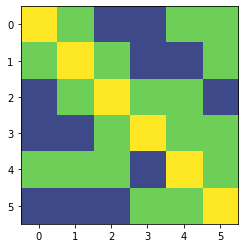

the set of buildable targets


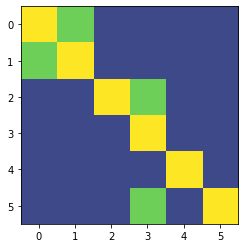

these 26 cubes are Buildable:
['123.465', '123.546', '123.564', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.524']
the original set of cubes


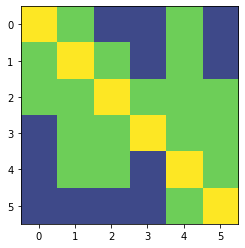

the set of buildable targets


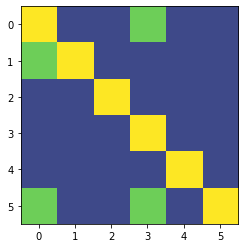

these 26 cubes are Buildable:
['123.456', '123.465', '123.546', '123.645', '123.654', '124.356', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.524']
the original set of cubes


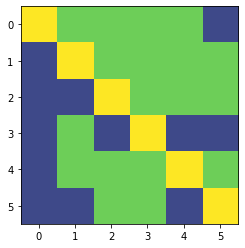

the set of buildable targets


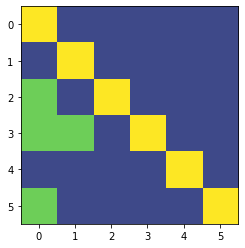

these 26 cubes are Buildable:
['123.456', '123.546', '123.564', '123.645', '123.654', '124.356', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.624', '136.425', '136.524']
the original set of cubes


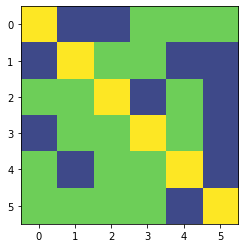

the set of buildable targets


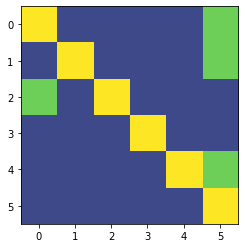

these 26 cubes are Buildable:
['123.456', '123.465', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.634', '125.643', '126.345', '126.354', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425']
the original set of cubes


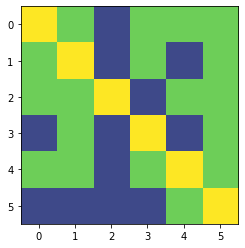

the set of buildable targets


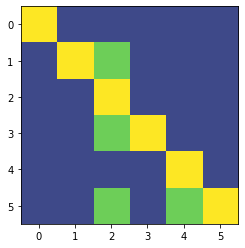

In [50]:
for twelveset in Sets12Build26:
    DisplaySetCubesandBuildableTargets(CubeCornersToNames(twelveset, C36), C36)

these 27 cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '123.654', '124.356', '124.365', '124.563', '124.635', '124.653', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


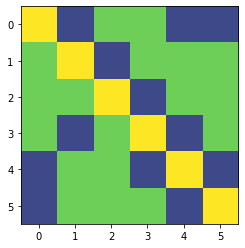

the set of buildable targets


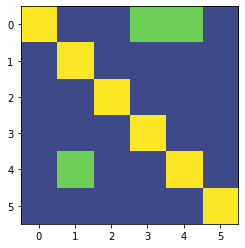

In [51]:
DisplaySetCubesandBuildableTargets(CubeCornersToNames(ASet12Build27, C36), C36)

these 18 cubes are Buildable:
['123.456', '123.465', '123.546', '123.645', '125.346', '125.436', '125.463', '125.643', '126.345', '126.435', '126.453', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


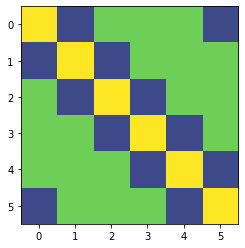

the set of buildable targets


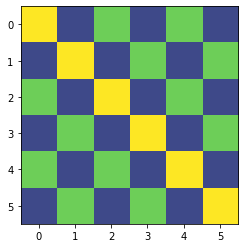

In [56]:
#possibly a min universal set??  "124.563", "124.653",
#"125.364", "126.354",
Names = ["135.426","136.425", "126.453", "123.456", "136.524", "134.526", "125.436", "126.435", "134.625", "135.624", "123.465", "125.463"]
DisplaySetCubesandBuildableTargets(Names, C36)

In [44]:
#Want to find
#28 : 1
#27 : 1
#26 : 6
#remove 25 : 71
setsof12buildMoreThan24 =[ [[123, 243, 345, 135, 156, 465, 264, 162], [143, 345, 235, 132, 126, 256, 465, 164], [143, 124, 254, 345, 356, 265, 162, 136], [152, 123, 134, 145, 465, 364, 263, 256], [354, 145, 124, 234, 263, 162, 156, 365], [152, 135, 345, 254, 246, 364, 163, 126], [243, 142, 154, 345, 356, 165, 126, 236], [154, 143, 132, 125, 265, 236, 346, 456], [245, 354, 153, 125, 162, 136, 346, 264], [123, 253, 354, 134, 146, 456, 265, 162], [235, 345, 154, 125, 162, 146, 364, 263], [245, 125, 132, 234, 364, 163, 156, 465]],
[[154, 143, 132, 125, 265, 236, 346, 456], [243, 123, 152, 254, 456, 165, 136, 346], [153, 134, 142, 125, 265, 246, 364, 356], [243, 142, 154, 345, 356, 165, 126, 236], [124, 152, 253, 234, 364, 356, 165, 146], [153, 235, 243, 134, 146, 264, 256, 165], [354, 145, 124, 234, 263, 162, 156, 365], [154, 142, 123, 135, 365, 263, 246, 456], [152, 135, 345, 254, 246, 364, 163, 126], [123, 243, 345, 135, 156, 465, 264, 162], [354, 245, 142, 134, 163, 126, 256, 365], [245, 253, 123, 142, 164, 136, 356, 465]],
[[243, 254, 145, 134, 163, 156, 265, 236], [152, 124, 143, 135, 365, 346, 264, 256], [123, 253, 354, 134, 146, 456, 265, 162], [143, 124, 254, 345, 356, 265, 162, 136], [143, 154, 245, 234, 263, 256, 165, 136], [143, 345, 235, 132, 126, 256, 465, 164], [243, 142, 154, 345, 356, 165, 126, 236], [154, 143, 132, 125, 265, 236, 346, 456], [153, 134, 142, 125, 265, 246, 364, 356], [152, 135, 345, 254, 246, 364, 163, 126], [143, 234, 253, 135, 156, 265, 246, 164], [153, 132, 124, 145, 465, 264, 236, 356]],
[[235, 345, 154, 125, 162, 146, 364, 263], [154, 142, 123, 135, 365, 263, 246, 456], [123, 253, 354, 134, 146, 456, 265, 162], [153, 132, 124, 145, 465, 264, 236, 356], [245, 354, 153, 125, 162, 136, 346, 264], [143, 234, 253, 135, 156, 265, 246, 164], [152, 135, 345, 254, 246, 364, 163, 126], [143, 124, 254, 345, 356, 265, 162, 136], [235, 153, 145, 254, 246, 164, 136, 263], [354, 245, 142, 134, 163, 126, 256, 365], [153, 354, 234, 132, 126, 246, 456, 165], [243, 235, 125, 142, 164, 156, 365, 346]],
[[153, 132, 124, 145, 465, 264, 236, 356], [143, 345, 235, 132, 126, 256, 465, 164], [235, 345, 154, 125, 162, 146, 364, 263], [245, 125, 132, 234, 364, 163, 156, 465], [243, 123, 152, 254, 456, 165, 136, 346], [143, 154, 245, 234, 263, 256, 165, 136], [245, 253, 123, 142, 164, 136, 356, 465], [123, 253, 354, 134, 146, 456, 265, 162], [235, 153, 145, 254, 246, 164, 136, 263], [243, 254, 145, 134, 163, 156, 265, 236], [354, 245, 142, 134, 163, 126, 256, 365], [152, 135, 345, 254, 246, 364, 163, 126]],
[[152, 145, 354, 253, 236, 346, 164, 126], [152, 135, 345, 254, 246, 364, 163, 126], [235, 153, 145, 254, 246, 164, 136, 263], [153, 134, 142, 125, 265, 246, 364, 356], [124, 152, 253, 234, 364, 356, 165, 146], [123, 253, 354, 134, 146, 456, 265, 162], [154, 143, 132, 125, 265, 236, 346, 456], [354, 245, 142, 134, 163, 126, 256, 365], [245, 125, 132, 234, 364, 163, 156, 465], [124, 132, 235, 254, 456, 365, 163, 146], [243, 235, 125, 142, 164, 156, 365, 346], [123, 243, 345, 135, 156, 465, 264, 162]],
[[124, 152, 253, 234, 364, 356, 165, 146], [235, 153, 145, 254, 246, 164, 136, 263], [153, 354, 234, 132, 126, 246, 456, 165], [153, 132, 124, 145, 465, 264, 236, 356], [354, 245, 142, 134, 163, 126, 256, 365], [243, 142, 154, 345, 356, 165, 126, 236], [243, 123, 152, 254, 456, 165, 136, 346], [143, 154, 245, 234, 263, 256, 165, 136], [124, 132, 235, 254, 456, 365, 163, 146], [123, 243, 345, 135, 156, 465, 264, 162], [153, 134, 142, 125, 265, 246, 364, 356], [245, 354, 153, 125, 162, 136, 346, 264]],
[[152, 135, 345, 254, 246, 364, 163, 126], [243, 123, 152, 254, 456, 165, 136, 346], [152, 123, 134, 145, 465, 364, 263, 256], [124, 132, 235, 254, 456, 365, 163, 146], [143, 154, 245, 234, 263, 256, 165, 136], [123, 253, 354, 134, 146, 456, 265, 162], [153, 134, 142, 125, 265, 246, 364, 356], [143, 124, 254, 345, 356, 265, 162, 136], [245, 253, 123, 142, 164, 136, 356, 465], [243, 254, 145, 134, 163, 156, 265, 236], [143, 345, 235, 132, 126, 256, 465, 164], [153, 132, 124, 145, 465, 264, 236, 356]],
[[354, 145, 124, 234, 263, 162, 156, 365], [153, 354, 234, 132, 126, 246, 456, 165], [153, 235, 243, 134, 146, 264, 256, 165], [245, 125, 132, 234, 364, 163, 156, 465], [152, 135, 345, 254, 246, 364, 163, 126], [243, 142, 154, 345, 356, 165, 126, 236], [124, 152, 253, 234, 364, 356, 165, 146], [245, 253, 123, 142, 164, 136, 356, 465], [153, 132, 124, 145, 465, 264, 236, 356], [152, 124, 143, 135, 365, 346, 264, 256], [153, 134, 142, 125, 265, 246, 364, 356], [235, 153, 145, 254, 246, 164, 136, 263]],
[[245, 125, 132, 234, 364, 163, 156, 465], [143, 234, 253, 135, 156, 265, 246, 164], [153, 235, 243, 134, 146, 264, 256, 165], [153, 354, 234, 132, 126, 246, 456, 165], [152, 135, 345, 254, 246, 364, 163, 126], [354, 145, 124, 234, 263, 162, 156, 365], [154, 143, 132, 125, 265, 236, 346, 456], [245, 354, 153, 125, 162, 136, 346, 264], [153, 132, 124, 145, 465, 264, 236, 356], [235, 153, 145, 254, 246, 164, 136, 263], [245, 253, 123, 142, 164, 136, 356, 465], [152, 123, 134, 145, 465, 364, 263, 256]],
[[243, 235, 125, 142, 164, 156, 365, 346], [143, 345, 235, 132, 126, 256, 465, 164], [245, 354, 153, 125, 162, 136, 346, 264], [245, 154, 135, 253, 236, 163, 146, 264], [143, 124, 254, 345, 356, 265, 162, 136], [354, 145, 124, 234, 263, 162, 156, 365], [123, 253, 354, 134, 146, 456, 265, 162], [354, 245, 142, 134, 163, 126, 256, 365], [143, 234, 253, 135, 156, 265, 246, 164], [235, 345, 154, 125, 162, 146, 364, 263], [153, 354, 234, 132, 126, 246, 456, 165], [152, 135, 345, 254, 246, 364, 163, 126]],
[[235, 345, 154, 125, 162, 146, 364, 263], [123, 253, 354, 134, 146, 456, 265, 162], [245, 354, 153, 125, 162, 136, 346, 264], [245, 253, 123, 142, 164, 136, 356, 465], [153, 132, 124, 145, 465, 264, 236, 356], [154, 142, 123, 135, 365, 263, 246, 456], [245, 125, 132, 234, 364, 163, 156, 465], [152, 135, 345, 254, 246, 364, 163, 126], [153, 354, 234, 132, 126, 246, 456, 165], [243, 142, 154, 345, 356, 165, 126, 236], [152, 123, 134, 145, 465, 364, 263, 256], [143, 124, 254, 345, 356, 265, 162, 136]],
[[153, 134, 142, 125, 265, 246, 364, 356], [243, 142, 154, 345, 356, 165, 126, 236], [123, 243, 345, 135, 156, 465, 264, 162], [123, 253, 354, 134, 146, 456, 265, 162], [152, 123, 134, 145, 465, 364, 263, 256], [354, 145, 124, 234, 263, 162, 156, 365], [143, 345, 235, 132, 126, 256, 465, 164], [235, 345, 154, 125, 162, 146, 364, 263], [154, 143, 132, 125, 265, 236, 346, 456], [143, 124, 254, 345, 356, 265, 162, 136], [152, 135, 345, 254, 246, 364, 163, 126], [143, 154, 245, 234, 263, 256, 165, 136]],
[[143, 234, 253, 135, 156, 265, 246, 164], [123, 253, 354, 134, 146, 456, 265, 162], [354, 145, 124, 234, 263, 162, 156, 365], [153, 235, 243, 134, 146, 264, 256, 165], [152, 145, 354, 253, 236, 346, 164, 126], [354, 245, 142, 134, 163, 126, 256, 365], [152, 135, 345, 254, 246, 364, 163, 126], [143, 154, 245, 234, 263, 256, 165, 136], [243, 235, 125, 142, 164, 156, 365, 346], [143, 124, 254, 345, 356, 265, 162, 136], [154, 143, 132, 125, 265, 236, 346, 456], [245, 253, 123, 142, 164, 136, 356, 465]],
[[243, 235, 125, 142, 164, 156, 365, 346], [245, 154, 135, 253, 236, 163, 146, 264], [143, 345, 235, 132, 126, 256, 465, 164], [124, 132, 235, 254, 456, 365, 163, 146], [235, 153, 145, 254, 246, 164, 136, 263], [235, 345, 154, 125, 162, 146, 364, 263], [153, 132, 124, 145, 465, 264, 236, 356], [153, 235, 243, 134, 146, 264, 256, 165], [153, 354, 234, 132, 126, 246, 456, 165], [152, 145, 354, 253, 236, 346, 164, 126], [154, 142, 123, 135, 365, 263, 246, 456], [143, 234, 253, 135, 156, 265, 246, 164]],
[[143, 124, 254, 345, 356, 265, 162, 136], [245, 354, 153, 125, 162, 136, 346, 264], [143, 345, 235, 132, 126, 256, 465, 164], [354, 145, 124, 234, 263, 162, 156, 365], [123, 243, 345, 135, 156, 465, 264, 162], [152, 145, 354, 253, 236, 346, 164, 126], [235, 345, 154, 125, 162, 146, 364, 263], [243, 142, 154, 345, 356, 165, 126, 236], [354, 245, 142, 134, 163, 126, 256, 365], [124, 132, 235, 254, 456, 365, 163, 146], [152, 135, 345, 254, 246, 364, 163, 126], [243, 123, 152, 254, 456, 165, 136, 346]],
[[143, 234, 253, 135, 156, 265, 246, 164], [245, 125, 132, 234, 364, 163, 156, 465], [143, 154, 245, 234, 263, 256, 165, 136], [245, 253, 123, 142, 164, 136, 356, 465], [124, 132, 235, 254, 456, 365, 163, 146], [245, 354, 153, 125, 162, 136, 346, 264], [354, 245, 142, 134, 163, 126, 256, 365], [123, 243, 345, 135, 156, 465, 264, 162], [235, 153, 145, 254, 246, 164, 136, 263], [354, 145, 124, 234, 263, 162, 156, 365], [152, 123, 134, 145, 465, 364, 263, 256], [243, 142, 154, 345, 356, 165, 126, 236]],
[[152, 145, 354, 253, 236, 346, 164, 126], [143, 345, 235, 132, 126, 256, 465, 164], [245, 354, 153, 125, 162, 136, 346, 264], [243, 123, 152, 254, 456, 165, 136, 346], [154, 142, 123, 135, 365, 263, 246, 456], [143, 234, 253, 135, 156, 265, 246, 164], [153, 132, 124, 145, 465, 264, 236, 356], [235, 345, 154, 125, 162, 146, 364, 263], [245, 125, 132, 234, 364, 163, 156, 465], [243, 254, 145, 134, 163, 156, 265, 236], [243, 142, 154, 345, 356, 165, 126, 236], [124, 132, 235, 254, 456, 365, 163, 146]],
[[123, 243, 345, 135, 156, 465, 264, 162], [143, 154, 245, 234, 263, 256, 165, 136], [152, 145, 354, 253, 236, 346, 164, 126], [243, 254, 145, 134, 163, 156, 265, 236], [153, 354, 234, 132, 126, 246, 456, 165], [243, 235, 125, 142, 164, 156, 365, 346], [235, 153, 145, 254, 246, 164, 136, 263], [152, 135, 345, 254, 246, 364, 163, 126], [124, 132, 235, 254, 456, 365, 163, 146], [143, 234, 253, 135, 156, 265, 246, 164], [153, 132, 124, 145, 465, 264, 236, 356], [245, 125, 132, 234, 364, 163, 156, 465]],
[[152, 124, 143, 135, 365, 346, 264, 256], [124, 132, 235, 254, 456, 365, 163, 146], [123, 243, 345, 135, 156, 465, 264, 162], [243, 235, 125, 142, 164, 156, 365, 346], [143, 124, 254, 345, 356, 265, 162, 136], [153, 134, 142, 125, 265, 246, 364, 356], [235, 345, 154, 125, 162, 146, 364, 263], [152, 135, 345, 254, 246, 364, 163, 126], [245, 125, 132, 234, 364, 163, 156, 465], [243, 142, 154, 345, 356, 165, 126, 236], [152, 145, 354, 253, 236, 346, 164, 126], [354, 245, 142, 134, 163, 126, 256, 365]],
[[245, 154, 135, 253, 236, 163, 146, 264], [143, 345, 235, 132, 126, 256, 465, 164], [143, 124, 254, 345, 356, 265, 162, 136], [153, 134, 142, 125, 265, 246, 364, 356], [243, 235, 125, 142, 164, 156, 365, 346], [124, 152, 253, 234, 364, 356, 165, 146], [152, 123, 134, 145, 465, 364, 263, 256], [152, 145, 354, 253, 236, 346, 164, 126], [154, 142, 123, 135, 365, 263, 246, 456], [124, 132, 235, 254, 456, 365, 163, 146], [245, 125, 132, 234, 364, 163, 156, 465], [153, 235, 243, 134, 146, 264, 256, 165]],
[[143, 234, 253, 135, 156, 265, 246, 164], [243, 235, 125, 142, 164, 156, 365, 346], [154, 143, 132, 125, 265, 236, 346, 456], [245, 354, 153, 125, 162, 136, 346, 264], [235, 345, 154, 125, 162, 146, 364, 263], [124, 132, 235, 254, 456, 365, 163, 146], [243, 142, 154, 345, 356, 165, 126, 236], [243, 123, 152, 254, 456, 165, 136, 346], [354, 245, 142, 134, 163, 126, 256, 365], [245, 253, 123, 142, 164, 136, 356, 465], [152, 123, 134, 145, 465, 364, 263, 256], [153, 134, 142, 125, 265, 246, 364, 356]],
[[124, 152, 253, 234, 364, 356, 165, 146], [243, 254, 145, 134, 163, 156, 265, 236], [152, 145, 354, 253, 236, 346, 164, 126], [354, 145, 124, 234, 263, 162, 156, 365], [153, 134, 142, 125, 265, 246, 364, 356], [152, 135, 345, 254, 246, 364, 163, 126], [152, 123, 134, 145, 465, 364, 263, 256], [243, 235, 125, 142, 164, 156, 365, 346], [154, 143, 132, 125, 265, 236, 346, 456], [152, 124, 143, 135, 365, 346, 264, 256], [243, 123, 152, 254, 456, 165, 136, 346], [245, 354, 153, 125, 162, 136, 346, 264]],
[[354, 145, 124, 234, 263, 162, 156, 365], [245, 154, 135, 253, 236, 163, 146, 264], [143, 154, 245, 234, 263, 256, 165, 136], [123, 243, 345, 135, 156, 465, 264, 162], [245, 354, 153, 125, 162, 136, 346, 264], [143, 124, 254, 345, 356, 265, 162, 136], [153, 235, 243, 134, 146, 264, 256, 165], [152, 123, 134, 145, 465, 364, 263, 256], [124, 132, 235, 254, 456, 365, 163, 146], [154, 142, 123, 135, 365, 263, 246, 456], [143, 345, 235, 132, 126, 256, 465, 164], [153, 134, 142, 125, 265, 246, 364, 356]],
[[152, 135, 345, 254, 246, 364, 163, 126], [235, 153, 145, 254, 246, 164, 136, 263], [123, 253, 354, 134, 146, 456, 265, 162], [152, 124, 143, 135, 365, 346, 264, 256], [153, 354, 234, 132, 126, 246, 456, 165], [243, 235, 125, 142, 164, 156, 365, 346], [153, 134, 142, 125, 265, 246, 364, 356], [143, 154, 245, 234, 263, 256, 165, 136], [153, 132, 124, 145, 465, 264, 236, 356], [245, 154, 135, 253, 236, 163, 146, 264], [123, 243, 345, 135, 156, 465, 264, 162], [124, 132, 235, 254, 456, 365, 163, 146]],
[[143, 345, 235, 132, 126, 256, 465, 164], [154, 142, 123, 135, 365, 263, 246, 456], [152, 145, 354, 253, 236, 346, 164, 126], [243, 254, 145, 134, 163, 156, 265, 236], [153, 235, 243, 134, 146, 264, 256, 165], [354, 145, 124, 234, 263, 162, 156, 365], [153, 132, 124, 145, 465, 264, 236, 356], [143, 124, 254, 345, 356, 265, 162, 136], [245, 253, 123, 142, 164, 136, 356, 465], [152, 135, 345, 254, 246, 364, 163, 126], [124, 152, 253, 234, 364, 356, 165, 146], [245, 125, 132, 234, 364, 163, 156, 465]],
[[153, 132, 124, 145, 465, 264, 236, 356], [243, 254, 145, 134, 163, 156, 265, 236], [152, 145, 354, 253, 236, 346, 164, 126], [123, 253, 354, 134, 146, 456, 265, 162], [152, 124, 143, 135, 365, 346, 264, 256], [243, 123, 152, 254, 456, 165, 136, 346], [245, 253, 123, 142, 164, 136, 356, 465], [124, 152, 253, 234, 364, 356, 165, 146], [235, 345, 154, 125, 162, 146, 364, 263], [154, 142, 123, 135, 365, 263, 246, 456], [143, 345, 235, 132, 126, 256, 465, 164], [153, 235, 243, 134, 146, 264, 256, 165]],
[[243, 142, 154, 345, 356, 165, 126, 236], [154, 143, 132, 125, 265, 236, 346, 456], [124, 152, 253, 234, 364, 356, 165, 146], [153, 134, 142, 125, 265, 246, 364, 356], [235, 153, 145, 254, 246, 164, 136, 263], [143, 154, 245, 234, 263, 256, 165, 136], [152, 123, 134, 145, 465, 364, 263, 256], [152, 145, 354, 253, 236, 346, 164, 126], [235, 345, 154, 125, 162, 146, 364, 263], [123, 243, 345, 135, 156, 465, 264, 162], [154, 142, 123, 135, 365, 263, 246, 456], [124, 132, 235, 254, 456, 365, 163, 146]],
[[235, 153, 145, 254, 246, 164, 136, 263], [354, 145, 124, 234, 263, 162, 156, 365], [124, 132, 235, 254, 456, 365, 163, 146], [245, 253, 123, 142, 164, 136, 356, 465], [153, 134, 142, 125, 265, 246, 364, 356], [153, 132, 124, 145, 465, 264, 236, 356], [123, 243, 345, 135, 156, 465, 264, 162], [143, 154, 245, 234, 263, 256, 165, 136], [154, 142, 123, 135, 365, 263, 246, 456], [153, 235, 243, 134, 146, 264, 256, 165], [243, 235, 125, 142, 164, 156, 365, 346], [152, 135, 345, 254, 246, 364, 163, 126]],
[[245, 253, 123, 142, 164, 136, 356, 465], [152, 135, 345, 254, 246, 364, 163, 126], [235, 345, 154, 125, 162, 146, 364, 263], [243, 123, 152, 254, 456, 165, 136, 346], [354, 145, 124, 234, 263, 162, 156, 365], [124, 152, 253, 234, 364, 356, 165, 146], [143, 154, 245, 234, 263, 256, 165, 136], [243, 142, 154, 345, 356, 165, 126, 236], [123, 243, 345, 135, 156, 465, 264, 162], [153, 132, 124, 145, 465, 264, 236, 356], [154, 143, 132, 125, 265, 236, 346, 456], [153, 134, 142, 125, 265, 246, 364, 356]],
[[245, 154, 135, 253, 236, 163, 146, 264], [235, 153, 145, 254, 246, 164, 136, 263], [153, 134, 142, 125, 265, 246, 364, 356], [143, 124, 254, 345, 356, 265, 162, 136], [354, 245, 142, 134, 163, 126, 256, 365], [243, 123, 152, 254, 456, 165, 136, 346], [243, 235, 125, 142, 164, 156, 365, 346], [243, 254, 145, 134, 163, 156, 265, 236], [153, 235, 243, 134, 146, 264, 256, 165], [143, 345, 235, 132, 126, 256, 465, 164], [152, 135, 345, 254, 246, 364, 163, 126], [153, 354, 234, 132, 126, 246, 456, 165]],
[[243, 254, 145, 134, 163, 156, 265, 236], [235, 153, 145, 254, 246, 164, 136, 263], [154, 142, 123, 135, 365, 263, 246, 456], [243, 142, 154, 345, 356, 165, 126, 236], [152, 124, 143, 135, 365, 346, 264, 256], [143, 234, 253, 135, 156, 265, 246, 164], [245, 354, 153, 125, 162, 136, 346, 264], [153, 354, 234, 132, 126, 246, 456, 165], [153, 132, 124, 145, 465, 264, 236, 356], [243, 123, 152, 254, 456, 165, 136, 346], [153, 134, 142, 125, 265, 246, 364, 356], [123, 253, 354, 134, 146, 456, 265, 162]],
[[152, 124, 143, 135, 365, 346, 264, 256], [123, 253, 354, 134, 146, 456, 265, 162], [123, 243, 345, 135, 156, 465, 264, 162], [245, 125, 132, 234, 364, 163, 156, 465], [235, 345, 154, 125, 162, 146, 364, 263], [354, 245, 142, 134, 163, 126, 256, 365], [235, 153, 145, 254, 246, 164, 136, 263], [245, 253, 123, 142, 164, 136, 356, 465], [154, 143, 132, 125, 265, 236, 346, 456], [153, 134, 142, 125, 265, 246, 364, 356], [243, 123, 152, 254, 456, 165, 136, 346], [153, 354, 234, 132, 126, 246, 456, 165]],
[[245, 354, 153, 125, 162, 136, 346, 264], [143, 234, 253, 135, 156, 265, 246, 164], [143, 124, 254, 345, 356, 265, 162, 136], [243, 235, 125, 142, 164, 156, 365, 346], [235, 345, 154, 125, 162, 146, 364, 263], [153, 354, 234, 132, 126, 246, 456, 165], [243, 254, 145, 134, 163, 156, 265, 236], [152, 123, 134, 145, 465, 364, 263, 256], [143, 154, 245, 234, 263, 256, 165, 136], [123, 243, 345, 135, 156, 465, 264, 162], [243, 142, 154, 345, 356, 165, 126, 236], [245, 125, 132, 234, 364, 163, 156, 465]],
[[154, 143, 132, 125, 265, 236, 346, 456], [354, 145, 124, 234, 263, 162, 156, 365], [143, 124, 254, 345, 356, 265, 162, 136], [354, 245, 142, 134, 163, 126, 256, 365], [243, 235, 125, 142, 164, 156, 365, 346], [243, 123, 152, 254, 456, 165, 136, 346], [153, 134, 142, 125, 265, 246, 364, 356], [123, 253, 354, 134, 146, 456, 265, 162], [245, 125, 132, 234, 364, 163, 156, 465], [143, 154, 245, 234, 263, 256, 165, 136], [123, 243, 345, 135, 156, 465, 264, 162], [153, 235, 243, 134, 146, 264, 256, 165]],
[[235, 153, 145, 254, 246, 164, 136, 263], [143, 124, 254, 345, 356, 265, 162, 136], [152, 124, 143, 135, 365, 346, 264, 256], [152, 145, 354, 253, 236, 346, 164, 126], [245, 354, 153, 125, 162, 136, 346, 264], [124, 152, 253, 234, 364, 356, 165, 146], [245, 125, 132, 234, 364, 163, 156, 465], [243, 142, 154, 345, 356, 165, 126, 236], [154, 142, 123, 135, 365, 263, 246, 456], [153, 235, 243, 134, 146, 264, 256, 165], [243, 254, 145, 134, 163, 156, 265, 236], [243, 123, 152, 254, 456, 165, 136, 346]],
[[154, 142, 123, 135, 365, 263, 246, 456], [245, 253, 123, 142, 164, 136, 356, 465], [152, 135, 345, 254, 246, 364, 163, 126], [235, 345, 154, 125, 162, 146, 364, 263], [153, 132, 124, 145, 465, 264, 236, 356], [153, 354, 234, 132, 126, 246, 456, 165], [153, 235, 243, 134, 146, 264, 256, 165], [245, 354, 153, 125, 162, 136, 346, 264], [354, 145, 124, 234, 263, 162, 156, 365], [153, 134, 142, 125, 265, 246, 364, 356], [152, 124, 143, 135, 365, 346, 264, 256], [235, 153, 145, 254, 246, 164, 136, 263]],
[[243, 123, 152, 254, 456, 165, 136, 346], [354, 145, 124, 234, 263, 162, 156, 365], [245, 154, 135, 253, 236, 163, 146, 264], [143, 124, 254, 345, 356, 265, 162, 136], [235, 345, 154, 125, 162, 146, 364, 263], [235, 153, 145, 254, 246, 164, 136, 263], [245, 125, 132, 234, 364, 163, 156, 465], [123, 243, 345, 135, 156, 465, 264, 162], [154, 143, 132, 125, 265, 236, 346, 456], [243, 142, 154, 345, 356, 165, 126, 236], [354, 245, 142, 134, 163, 126, 256, 365], [143, 234, 253, 135, 156, 265, 246, 164]],
[[143, 345, 235, 132, 126, 256, 465, 164], [152, 145, 354, 253, 236, 346, 164, 126], [152, 135, 345, 254, 246, 364, 163, 126], [123, 243, 345, 135, 156, 465, 264, 162], [154, 142, 123, 135, 365, 263, 246, 456], [243, 123, 152, 254, 456, 165, 136, 346], [235, 345, 154, 125, 162, 146, 364, 263], [154, 143, 132, 125, 265, 236, 346, 456], [354, 145, 124, 234, 263, 162, 156, 365], [143, 124, 254, 345, 356, 265, 162, 136], [245, 354, 153, 125, 162, 136, 346, 264], [354, 245, 142, 134, 163, 126, 256, 365]],
[[152, 123, 134, 145, 465, 364, 263, 256], [143, 154, 245, 234, 263, 256, 165, 136], [123, 253, 354, 134, 146, 456, 265, 162], [123, 243, 345, 135, 156, 465, 264, 162], [245, 253, 123, 142, 164, 136, 356, 465], [152, 124, 143, 135, 365, 346, 264, 256], [245, 354, 153, 125, 162, 136, 346, 264], [143, 345, 235, 132, 126, 256, 465, 164], [153, 134, 142, 125, 265, 246, 364, 356], [243, 142, 154, 345, 356, 165, 126, 236], [354, 145, 124, 234, 263, 162, 156, 365], [124, 132, 235, 254, 456, 365, 163, 146]],
[[143, 124, 254, 345, 356, 265, 162, 136], [124, 132, 235, 254, 456, 365, 163, 146], [152, 124, 143, 135, 365, 346, 264, 256], [245, 354, 153, 125, 162, 136, 346, 264], [245, 154, 135, 253, 236, 163, 146, 264], [153, 354, 234, 132, 126, 246, 456, 165], [243, 254, 145, 134, 163, 156, 265, 236], [243, 235, 125, 142, 164, 156, 365, 346], [152, 135, 345, 254, 246, 364, 163, 126], [235, 153, 145, 254, 246, 164, 136, 263], [245, 253, 123, 142, 164, 136, 356, 465], [123, 243, 345, 135, 156, 465, 264, 162]],
[[245, 354, 153, 125, 162, 136, 346, 264], [143, 234, 253, 135, 156, 265, 246, 164], [143, 154, 245, 234, 263, 256, 165, 136], [123, 243, 345, 135, 156, 465, 264, 162], [243, 235, 125, 142, 164, 156, 365, 346], [153, 354, 234, 132, 126, 246, 456, 165], [243, 254, 145, 134, 163, 156, 265, 236], [152, 124, 143, 135, 365, 346, 264, 256], [154, 142, 123, 135, 365, 263, 246, 456], [154, 143, 132, 125, 265, 236, 346, 456], [124, 152, 253, 234, 364, 356, 165, 146], [245, 125, 132, 234, 364, 163, 156, 465]],
[[245, 354, 153, 125, 162, 136, 346, 264], [243, 254, 145, 134, 163, 156, 265, 236], [154, 143, 132, 125, 265, 236, 346, 456], [123, 253, 354, 134, 146, 456, 265, 162], [143, 154, 245, 234, 263, 256, 165, 136], [153, 134, 142, 125, 265, 246, 364, 356], [235, 345, 154, 125, 162, 146, 364, 263], [124, 152, 253, 234, 364, 356, 165, 146], [152, 135, 345, 254, 246, 364, 163, 126], [152, 124, 143, 135, 365, 346, 264, 256], [354, 145, 124, 234, 263, 162, 156, 365], [245, 253, 123, 142, 164, 136, 356, 465]],
[[245, 253, 123, 142, 164, 136, 356, 465], [243, 235, 125, 142, 164, 156, 365, 346], [152, 124, 143, 135, 365, 346, 264, 256], [235, 345, 154, 125, 162, 146, 364, 263], [152, 145, 354, 253, 236, 346, 164, 126], [124, 132, 235, 254, 456, 365, 163, 146], [143, 234, 253, 135, 156, 265, 246, 164], [354, 245, 142, 134, 163, 126, 256, 365], [124, 152, 253, 234, 364, 356, 165, 146], [243, 254, 145, 134, 163, 156, 265, 236], [143, 124, 254, 345, 356, 265, 162, 136], [153, 132, 124, 145, 465, 264, 236, 356]],
[[243, 254, 145, 134, 163, 156, 265, 236], [153, 354, 234, 132, 126, 246, 456, 165], [354, 245, 142, 134, 163, 126, 256, 365], [152, 135, 345, 254, 246, 364, 163, 126], [143, 154, 245, 234, 263, 256, 165, 136], [243, 123, 152, 254, 456, 165, 136, 346], [243, 235, 125, 142, 164, 156, 365, 346], [123, 253, 354, 134, 146, 456, 265, 162], [143, 124, 254, 345, 356, 265, 162, 136], [245, 253, 123, 142, 164, 136, 356, 465], [154, 142, 123, 135, 365, 263, 246, 456], [153, 132, 124, 145, 465, 264, 236, 356]],
[[153, 134, 142, 125, 265, 246, 364, 356], [143, 154, 245, 234, 263, 256, 165, 136], [153, 132, 124, 145, 465, 264, 236, 356], [354, 245, 142, 134, 163, 126, 256, 365], [235, 345, 154, 125, 162, 146, 364, 263], [243, 254, 145, 134, 163, 156, 265, 236], [143, 345, 235, 132, 126, 256, 465, 164], [124, 152, 253, 234, 364, 356, 165, 146], [143, 234, 253, 135, 156, 265, 246, 164], [243, 123, 152, 254, 456, 165, 136, 346], [152, 124, 143, 135, 365, 346, 264, 256], [245, 253, 123, 142, 164, 136, 356, 465]],
[[124, 132, 235, 254, 456, 365, 163, 146], [152, 123, 134, 145, 465, 364, 263, 256], [245, 154, 135, 253, 236, 163, 146, 264], [243, 254, 145, 134, 163, 156, 265, 236], [154, 142, 123, 135, 365, 263, 246, 456], [143, 345, 235, 132, 126, 256, 465, 164], [354, 245, 142, 134, 163, 126, 256, 365], [143, 234, 253, 135, 156, 265, 246, 164], [243, 123, 152, 254, 456, 165, 136, 346], [154, 143, 132, 125, 265, 236, 346, 456], [245, 354, 153, 125, 162, 136, 346, 264], [143, 124, 254, 345, 356, 265, 162, 136]],
[[124, 132, 235, 254, 456, 365, 163, 146], [123, 253, 354, 134, 146, 456, 265, 162], [245, 253, 123, 142, 164, 136, 356, 465], [152, 135, 345, 254, 246, 364, 163, 126], [152, 145, 354, 253, 236, 346, 164, 126], [152, 124, 143, 135, 365, 346, 264, 256], [354, 245, 142, 134, 163, 126, 256, 365], [243, 142, 154, 345, 356, 165, 126, 236], [235, 345, 154, 125, 162, 146, 364, 263], [153, 132, 124, 145, 465, 264, 236, 356], [354, 145, 124, 234, 263, 162, 156, 365], [153, 354, 234, 132, 126, 246, 456, 165]],
[[243, 254, 145, 134, 163, 156, 265, 236], [153, 235, 243, 134, 146, 264, 256, 165], [143, 124, 254, 345, 356, 265, 162, 136], [245, 253, 123, 142, 164, 136, 356, 465], [143, 154, 245, 234, 263, 256, 165, 136], [243, 235, 125, 142, 164, 156, 365, 346], [124, 152, 253, 234, 364, 356, 165, 146], [143, 345, 235, 132, 126, 256, 465, 164], [154, 143, 132, 125, 265, 236, 346, 456], [152, 124, 143, 135, 365, 346, 264, 256], [153, 354, 234, 132, 126, 246, 456, 165], [235, 345, 154, 125, 162, 146, 364, 263]],
[[152, 135, 345, 254, 246, 364, 163, 126], [153, 235, 243, 134, 146, 264, 256, 165], [152, 124, 143, 135, 365, 346, 264, 256], [243, 235, 125, 142, 164, 156, 365, 346], [124, 152, 253, 234, 364, 356, 165, 146], [152, 123, 134, 145, 465, 364, 263, 256], [245, 125, 132, 234, 364, 163, 156, 465], [235, 345, 154, 125, 162, 146, 364, 263], [123, 253, 354, 134, 146, 456, 265, 162], [124, 132, 235, 254, 456, 365, 163, 146], [154, 143, 132, 125, 265, 236, 346, 456], [235, 153, 145, 254, 246, 164, 136, 263]],
[[235, 345, 154, 125, 162, 146, 364, 263], [124, 152, 253, 234, 364, 356, 165, 146], [152, 123, 134, 145, 465, 364, 263, 256], [354, 145, 124, 234, 263, 162, 156, 365], [152, 145, 354, 253, 236, 346, 164, 126], [243, 254, 145, 134, 163, 156, 265, 236], [243, 123, 152, 254, 456, 165, 136, 346], [152, 124, 143, 135, 365, 346, 264, 256], [154, 142, 123, 135, 365, 263, 246, 456], [245, 354, 153, 125, 162, 136, 346, 264], [152, 135, 345, 254, 246, 364, 163, 126], [154, 143, 132, 125, 265, 236, 346, 456]],
[[243, 254, 145, 134, 163, 156, 265, 236], [235, 345, 154, 125, 162, 146, 364, 263], [354, 145, 124, 234, 263, 162, 156, 365], [243, 123, 152, 254, 456, 165, 136, 346], [143, 345, 235, 132, 126, 256, 465, 164], [152, 123, 134, 145, 465, 364, 263, 256], [143, 234, 253, 135, 156, 265, 246, 164], [245, 154, 135, 253, 236, 163, 146, 264], [243, 235, 125, 142, 164, 156, 365, 346], [245, 354, 153, 125, 162, 136, 346, 264], [153, 134, 142, 125, 265, 246, 364, 356], [143, 124, 254, 345, 356, 265, 162, 136]],
[[154, 142, 123, 135, 365, 263, 246, 456], [245, 154, 135, 253, 236, 163, 146, 264], [153, 354, 234, 132, 126, 246, 456, 165], [152, 135, 345, 254, 246, 364, 163, 126], [143, 234, 253, 135, 156, 265, 246, 164], [243, 254, 145, 134, 163, 156, 265, 236], [124, 132, 235, 254, 456, 365, 163, 146], [235, 153, 145, 254, 246, 164, 136, 263], [153, 134, 142, 125, 265, 246, 364, 356], [152, 124, 143, 135, 365, 346, 264, 256], [245, 354, 153, 125, 162, 136, 346, 264], [152, 123, 134, 145, 465, 364, 263, 256]],
[[143, 124, 254, 345, 356, 265, 162, 136], [153, 354, 234, 132, 126, 246, 456, 165], [243, 254, 145, 134, 163, 156, 265, 236], [143, 154, 245, 234, 263, 256, 165, 136], [152, 124, 143, 135, 365, 346, 264, 256], [245, 125, 132, 234, 364, 163, 156, 465], [124, 132, 235, 254, 456, 365, 163, 146], [235, 153, 145, 254, 246, 164, 136, 263], [123, 243, 345, 135, 156, 465, 264, 162], [124, 152, 253, 234, 364, 356, 165, 146], [354, 245, 142, 134, 163, 126, 256, 365], [153, 134, 142, 125, 265, 246, 364, 356]],
[[235, 345, 154, 125, 162, 146, 364, 263], [153, 354, 234, 132, 126, 246, 456, 165], [245, 154, 135, 253, 236, 163, 146, 264], [143, 345, 235, 132, 126, 256, 465, 164], [123, 243, 345, 135, 156, 465, 264, 162], [152, 145, 354, 253, 236, 346, 164, 126], [243, 254, 145, 134, 163, 156, 265, 236], [154, 142, 123, 135, 365, 263, 246, 456], [143, 124, 254, 345, 356, 265, 162, 136], [354, 145, 124, 234, 263, 162, 156, 365], [243, 123, 152, 254, 456, 165, 136, 346], [152, 123, 134, 145, 465, 364, 263, 256]],
[[245, 154, 135, 253, 236, 163, 146, 264], [123, 253, 354, 134, 146, 456, 265, 162], [245, 253, 123, 142, 164, 136, 356, 465], [124, 132, 235, 254, 456, 365, 163, 146], [243, 235, 125, 142, 164, 156, 365, 346], [153, 354, 234, 132, 126, 246, 456, 165], [354, 145, 124, 234, 263, 162, 156, 365], [153, 235, 243, 134, 146, 264, 256, 165], [152, 135, 345, 254, 246, 364, 163, 126], [235, 345, 154, 125, 162, 146, 364, 263], [245, 354, 153, 125, 162, 136, 346, 264], [143, 234, 253, 135, 156, 265, 246, 164]],
[[153, 235, 243, 134, 146, 264, 256, 165], [154, 142, 123, 135, 365, 263, 246, 456], [152, 145, 354, 253, 236, 346, 164, 126], [123, 243, 345, 135, 156, 465, 264, 162], [354, 245, 142, 134, 163, 126, 256, 365], [124, 132, 235, 254, 456, 365, 163, 146], [153, 134, 142, 125, 265, 246, 364, 356], [235, 153, 145, 254, 246, 164, 136, 263], [143, 345, 235, 132, 126, 256, 465, 164], [354, 145, 124, 234, 263, 162, 156, 365], [154, 143, 132, 125, 265, 236, 346, 456], [143, 154, 245, 234, 263, 256, 165, 136]],
[[243, 235, 125, 142, 164, 156, 365, 346], [245, 253, 123, 142, 164, 136, 356, 465], [354, 145, 124, 234, 263, 162, 156, 365], [154, 142, 123, 135, 365, 263, 246, 456], [153, 354, 234, 132, 126, 246, 456, 165], [154, 143, 132, 125, 265, 236, 346, 456], [152, 124, 143, 135, 365, 346, 264, 256], [245, 154, 135, 253, 236, 163, 146, 264], [235, 153, 145, 254, 246, 164, 136, 263], [152, 135, 345, 254, 246, 364, 163, 126], [153, 134, 142, 125, 265, 246, 364, 356], [243, 123, 152, 254, 456, 165, 136, 346]],
[[154, 143, 132, 125, 265, 236, 346, 456], [153, 354, 234, 132, 126, 246, 456, 165], [245, 253, 123, 142, 164, 136, 356, 465], [152, 123, 134, 145, 465, 364, 263, 256], [243, 123, 152, 254, 456, 165, 136, 346], [243, 235, 125, 142, 164, 156, 365, 346], [245, 154, 135, 253, 236, 163, 146, 264], [245, 125, 132, 234, 364, 163, 156, 465], [153, 235, 243, 134, 146, 264, 256, 165], [143, 345, 235, 132, 126, 256, 465, 164], [154, 142, 123, 135, 365, 263, 246, 456], [354, 145, 124, 234, 263, 162, 156, 365]],
[[152, 145, 354, 253, 236, 346, 164, 126], [123, 243, 345, 135, 156, 465, 264, 162], [152, 124, 143, 135, 365, 346, 264, 256], [123, 253, 354, 134, 146, 456, 265, 162], [143, 154, 245, 234, 263, 256, 165, 136], [245, 125, 132, 234, 364, 163, 156, 465], [152, 135, 345, 254, 246, 364, 163, 126], [153, 235, 243, 134, 146, 264, 256, 165], [235, 153, 145, 254, 246, 164, 136, 263], [243, 123, 152, 254, 456, 165, 136, 346], [153, 132, 124, 145, 465, 264, 236, 356], [243, 142, 154, 345, 356, 165, 126, 236]],
[[243, 123, 152, 254, 456, 165, 136, 346], [154, 142, 123, 135, 365, 263, 246, 456], [143, 345, 235, 132, 126, 256, 465, 164], [235, 153, 145, 254, 246, 164, 136, 263], [143, 154, 245, 234, 263, 256, 165, 136], [245, 253, 123, 142, 164, 136, 356, 465], [143, 124, 254, 345, 356, 265, 162, 136], [152, 123, 134, 145, 465, 364, 263, 256], [153, 354, 234, 132, 126, 246, 456, 165], [245, 125, 132, 234, 364, 163, 156, 465], [245, 154, 135, 253, 236, 163, 146, 264], [245, 354, 153, 125, 162, 136, 346, 264]],
[[153, 354, 234, 132, 126, 246, 456, 165], [243, 123, 152, 254, 456, 165, 136, 346], [123, 253, 354, 134, 146, 456, 265, 162], [152, 135, 345, 254, 246, 364, 163, 126], [245, 253, 123, 142, 164, 136, 356, 465], [124, 132, 235, 254, 456, 365, 163, 146], [152, 145, 354, 253, 236, 346, 164, 126], [154, 143, 132, 125, 265, 236, 346, 456], [152, 123, 134, 145, 465, 364, 263, 256], [243, 254, 145, 134, 163, 156, 265, 236], [243, 235, 125, 142, 164, 156, 365, 346], [152, 124, 143, 135, 365, 346, 264, 256]],
[[123, 243, 345, 135, 156, 465, 264, 162], [243, 123, 152, 254, 456, 165, 136, 346], [152, 124, 143, 135, 365, 346, 264, 256], [124, 152, 253, 234, 364, 356, 165, 146], [243, 235, 125, 142, 164, 156, 365, 346], [153, 132, 124, 145, 465, 264, 236, 356], [143, 234, 253, 135, 156, 265, 246, 164], [245, 125, 132, 234, 364, 163, 156, 465], [243, 254, 145, 134, 163, 156, 265, 236], [354, 145, 124, 234, 263, 162, 156, 365], [235, 345, 154, 125, 162, 146, 364, 263], [153, 354, 234, 132, 126, 246, 456, 165]],
[[245, 354, 153, 125, 162, 136, 346, 264], [245, 154, 135, 253, 236, 163, 146, 264], [152, 123, 134, 145, 465, 364, 263, 256], [354, 145, 124, 234, 263, 162, 156, 365], [143, 154, 245, 234, 263, 256, 165, 136], [154, 142, 123, 135, 365, 263, 246, 456], [143, 345, 235, 132, 126, 256, 465, 164], [123, 243, 345, 135, 156, 465, 264, 162], [153, 134, 142, 125, 265, 246, 364, 356], [243, 123, 152, 254, 456, 165, 136, 346], [243, 254, 145, 134, 163, 156, 265, 236], [152, 145, 354, 253, 236, 346, 164, 126]],
[[154, 142, 123, 135, 365, 263, 246, 456], [354, 145, 124, 234, 263, 162, 156, 365], [354, 245, 142, 134, 163, 126, 256, 365], [152, 135, 345, 254, 246, 364, 163, 126], [152, 145, 354, 253, 236, 346, 164, 126], [143, 124, 254, 345, 356, 265, 162, 136], [243, 254, 145, 134, 163, 156, 265, 236], [124, 132, 235, 254, 456, 365, 163, 146], [245, 125, 132, 234, 364, 163, 156, 465], [124, 152, 253, 234, 364, 356, 165, 146], [243, 123, 152, 254, 456, 165, 136, 346], [245, 354, 153, 125, 162, 136, 346, 264]],
[[143, 124, 254, 345, 356, 265, 162, 136], [152, 124, 143, 135, 365, 346, 264, 256], [354, 145, 124, 234, 263, 162, 156, 365], [153, 132, 124, 145, 465, 264, 236, 356], [152, 135, 345, 254, 246, 364, 163, 126], [354, 245, 142, 134, 163, 126, 256, 365], [243, 235, 125, 142, 164, 156, 365, 346], [154, 142, 123, 135, 365, 263, 246, 456], [143, 154, 245, 234, 263, 256, 165, 136], [245, 154, 135, 253, 236, 163, 146, 264], [124, 132, 235, 254, 456, 365, 163, 146], [124, 152, 253, 234, 364, 356, 165, 146]],
[[245, 154, 135, 253, 236, 163, 146, 264], [153, 235, 243, 134, 146, 264, 256, 165], [243, 254, 145, 134, 163, 156, 265, 236], [243, 142, 154, 345, 356, 165, 126, 236], [152, 145, 354, 253, 236, 346, 164, 126], [354, 145, 124, 234, 263, 162, 156, 365], [143, 234, 253, 135, 156, 265, 246, 164], [243, 235, 125, 142, 164, 156, 365, 346], [152, 123, 134, 145, 465, 364, 263, 256], [245, 125, 132, 234, 364, 163, 156, 465], [243, 123, 152, 254, 456, 165, 136, 346], [123, 253, 354, 134, 146, 456, 265, 162]],
[[243, 142, 154, 345, 356, 165, 126, 236], [354, 145, 124, 234, 263, 162, 156, 365], [245, 253, 123, 142, 164, 136, 356, 465], [243, 123, 152, 254, 456, 165, 136, 346], [152, 123, 134, 145, 465, 364, 263, 256], [124, 132, 235, 254, 456, 365, 163, 146], [245, 354, 153, 125, 162, 136, 346, 264], [152, 145, 354, 253, 236, 346, 164, 126], [153, 134, 142, 125, 265, 246, 364, 356], [143, 345, 235, 132, 126, 256, 465, 164], [235, 345, 154, 125, 162, 146, 364, 263], [123, 243, 345, 135, 156, 465, 264, 162]],
[[143, 345, 235, 132, 126, 256, 465, 164], [123, 253, 354, 134, 146, 456, 265, 162], [143, 154, 245, 234, 263, 256, 165, 136], [354, 145, 124, 234, 263, 162, 156, 365], [143, 124, 254, 345, 356, 265, 162, 136], [152, 145, 354, 253, 236, 346, 164, 126], [123, 243, 345, 135, 156, 465, 264, 162], [153, 134, 142, 125, 265, 246, 364, 356], [154, 143, 132, 125, 265, 236, 346, 456], [154, 142, 123, 135, 365, 263, 246, 456], [235, 345, 154, 125, 162, 146, 364, 263], [245, 154, 135, 253, 236, 163, 146, 264]],
[[245, 154, 135, 253, 236, 163, 146, 264], [143, 234, 253, 135, 156, 265, 246, 164], [153, 132, 124, 145, 465, 264, 236, 356], [235, 345, 154, 125, 162, 146, 364, 263], [143, 124, 254, 345, 356, 265, 162, 136], [154, 142, 123, 135, 365, 263, 246, 456], [235, 153, 145, 254, 246, 164, 136, 263], [123, 253, 354, 134, 146, 456, 265, 162], [152, 135, 345, 254, 246, 364, 163, 126], [153, 235, 243, 134, 146, 264, 256, 165], [243, 123, 152, 254, 456, 165, 136, 346], [153, 354, 234, 132, 126, 246, 456, 165]],
[[143, 345, 235, 132, 126, 256, 465, 164], [124, 152, 253, 234, 364, 356, 165, 146], [154, 142, 123, 135, 365, 263, 246, 456], [154, 143, 132, 125, 265, 236, 346, 456], [243, 123, 152, 254, 456, 165, 136, 346], [123, 243, 345, 135, 156, 465, 264, 162], [245, 354, 153, 125, 162, 136, 346, 264], [143, 124, 254, 345, 356, 265, 162, 136], [235, 345, 154, 125, 162, 146, 364, 263], [243, 235, 125, 142, 164, 156, 365, 346], [152, 145, 354, 253, 236, 346, 164, 126], [354, 245, 142, 134, 163, 126, 256, 365]],
[[154, 142, 123, 135, 365, 263, 246, 456], [152, 135, 345, 254, 246, 364, 163, 126], [153, 354, 234, 132, 126, 246, 456, 165], [243, 235, 125, 142, 164, 156, 365, 346], [123, 243, 345, 135, 156, 465, 264, 162], [354, 145, 124, 234, 263, 162, 156, 365], [143, 124, 254, 345, 356, 265, 162, 136], [153, 235, 243, 134, 146, 264, 256, 165], [354, 245, 142, 134, 163, 126, 256, 365], [153, 132, 124, 145, 465, 264, 236, 356], [152, 124, 143, 135, 365, 346, 264, 256], [124, 152, 253, 234, 364, 356, 165, 146]],
[[123, 243, 345, 135, 156, 465, 264, 162], [354, 145, 124, 234, 263, 162, 156, 365], [235, 153, 145, 254, 246, 164, 136, 263], [143, 154, 245, 234, 263, 256, 165, 136], [245, 253, 123, 142, 164, 136, 356, 465], [143, 234, 253, 135, 156, 265, 246, 164], [152, 124, 143, 135, 365, 346, 264, 256], [243, 142, 154, 345, 356, 165, 126, 236], [152, 123, 134, 145, 465, 364, 263, 256], [124, 132, 235, 254, 456, 365, 163, 146], [245, 154, 135, 253, 236, 163, 146, 264], [235, 345, 154, 125, 162, 146, 364, 263]],
[[154, 143, 132, 125, 265, 236, 346, 456], [152, 145, 354, 253, 236, 346, 164, 126], [354, 145, 124, 234, 263, 162, 156, 365], [124, 152, 253, 234, 364, 356, 165, 146], [152, 135, 345, 254, 246, 364, 163, 126], [354, 245, 142, 134, 163, 126, 256, 365], [124, 132, 235, 254, 456, 365, 163, 146], [235, 153, 145, 254, 246, 164, 136, 263], [152, 123, 134, 145, 465, 364, 263, 256], [152, 124, 143, 135, 365, 346, 264, 256], [245, 253, 123, 142, 164, 136, 356, 465], [243, 235, 125, 142, 164, 156, 365, 346]],
[[245, 125, 132, 234, 364, 163, 156, 465], [243, 235, 125, 142, 164, 156, 365, 346], [354, 245, 142, 134, 163, 126, 256, 365], [152, 135, 345, 254, 246, 364, 163, 126], [152, 124, 143, 135, 365, 346, 264, 256], [124, 152, 253, 234, 364, 356, 165, 146], [123, 243, 345, 135, 156, 465, 264, 162], [153, 132, 124, 145, 465, 264, 236, 356], [235, 345, 154, 125, 162, 146, 364, 263], [143, 154, 245, 234, 263, 256, 165, 136], [154, 143, 132, 125, 265, 236, 346, 456], [143, 234, 253, 135, 156, 265, 246, 164]],
[[143, 234, 253, 135, 156, 265, 246, 164], [152, 135, 345, 254, 246, 364, 163, 126], [243, 142, 154, 345, 356, 165, 126, 236], [235, 153, 145, 254, 246, 164, 136, 263], [153, 235, 243, 134, 146, 264, 256, 165], [124, 152, 253, 234, 364, 356, 165, 146], [245, 253, 123, 142, 164, 136, 356, 465], [245, 354, 153, 125, 162, 136, 346, 264], [123, 253, 354, 134, 146, 456, 265, 162], [154, 142, 123, 135, 365, 263, 246, 456], [152, 124, 143, 135, 365, 346, 264, 256], [124, 132, 235, 254, 456, 365, 163, 146]],
[[243, 142, 154, 345, 356, 165, 126, 236], [235, 153, 145, 254, 246, 164, 136, 263], [123, 243, 345, 135, 156, 465, 264, 162], [154, 142, 123, 135, 365, 263, 246, 456], [143, 234, 253, 135, 156, 265, 246, 164], [245, 354, 153, 125, 162, 136, 346, 264], [243, 235, 125, 142, 164, 156, 365, 346], [143, 345, 235, 132, 126, 256, 465, 164], [124, 152, 253, 234, 364, 356, 165, 146], [354, 245, 142, 134, 163, 126, 256, 365], [124, 132, 235, 254, 456, 365, 163, 146], [243, 254, 145, 134, 163, 156, 265, 236]],
[[153, 354, 234, 132, 126, 246, 456, 165], [143, 234, 253, 135, 156, 265, 246, 164], [153, 235, 243, 134, 146, 264, 256, 165], [143, 345, 235, 132, 126, 256, 465, 164], [354, 145, 124, 234, 263, 162, 156, 365], [245, 125, 132, 234, 364, 163, 156, 465], [245, 253, 123, 142, 164, 136, 356, 465], [235, 153, 145, 254, 246, 164, 136, 263], [245, 154, 135, 253, 236, 163, 146, 264], [243, 123, 152, 254, 456, 165, 136, 346], [154, 142, 123, 135, 365, 263, 246, 456], [154, 143, 132, 125, 265, 236, 346, 456]],
[[152, 135, 345, 254, 246, 364, 163, 126], [235, 345, 154, 125, 162, 146, 364, 263], [245, 253, 123, 142, 164, 136, 356, 465], [153, 134, 142, 125, 265, 246, 364, 356], [124, 152, 253, 234, 364, 356, 165, 146], [243, 235, 125, 142, 164, 156, 365, 346], [152, 145, 354, 253, 236, 346, 164, 126], [143, 124, 254, 345, 356, 265, 162, 136], [354, 145, 124, 234, 263, 162, 156, 365], [154, 142, 123, 135, 365, 263, 246, 456], [143, 345, 235, 132, 126, 256, 465, 164], [245, 354, 153, 125, 162, 136, 346, 264]]]

these 27 cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.354', '126.435', '126.453', '126.543', '134.526', '135.426', '135.624', '136.524']
the original set of cubes


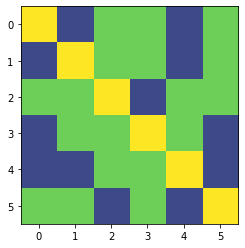

the set of buildable targets


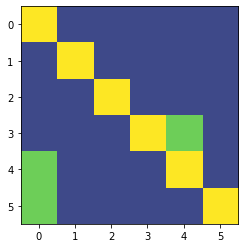

these 26 cubes are Buildable:
['123.456', '123.465', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '125.346', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '136.425', '136.524']
the original set of cubes


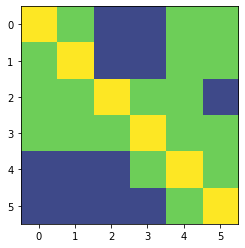

the set of buildable targets


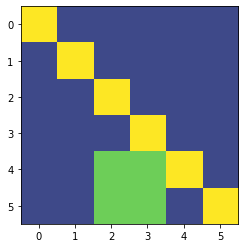

these 28 cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.436', '125.463', '125.634', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '136.425', '136.524']
the original set of cubes


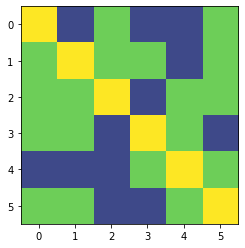

the set of buildable targets


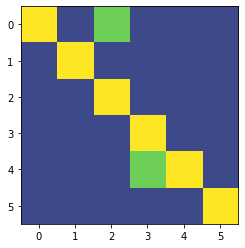

these 26 cubes are Buildable:
['123.456', '123.465', '123.546', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.635', '124.653', '125.364', '125.436', '125.634', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


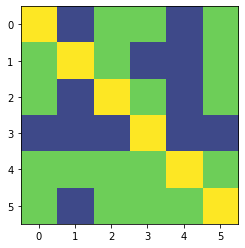

the set of buildable targets


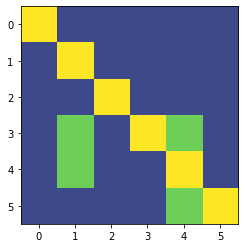

these 26 cubes are Buildable:
['123.456', '123.465', '123.546', '123.645', '123.654', '124.356', '124.365', '124.536', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '126.345', '126.354', '126.435', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


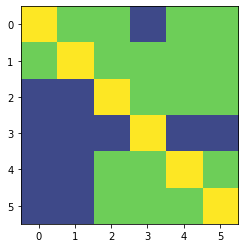

the set of buildable targets


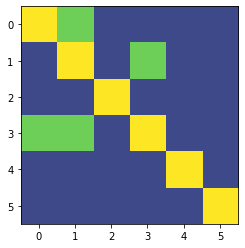

these 26 cubes are Buildable:
['123.456', '123.465', '123.564', '123.645', '123.654', '124.356', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.463', '125.634', '125.643', '126.345', '126.354', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.524']
the original set of cubes


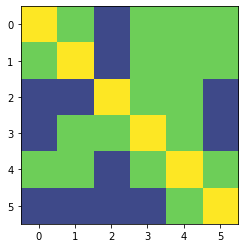

the set of buildable targets


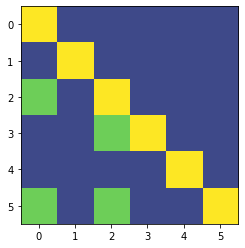

these 26 cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '123.645', '124.365', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', '125.643', '126.345', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


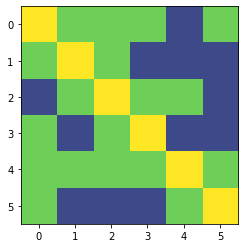

the set of buildable targets


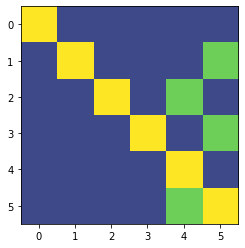

these 26 cubes are Buildable:
['123.456', '123.546', '123.564', '123.645', '123.654', '124.356', '124.365', '124.536', '124.563', '124.653', '125.364', '125.436', '125.463', '125.634', '125.643', '126.354', '126.435', '126.453', '126.534', '126.543', '134.526', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


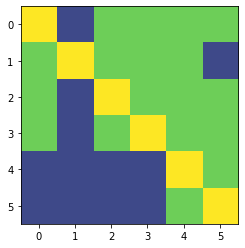

the set of buildable targets


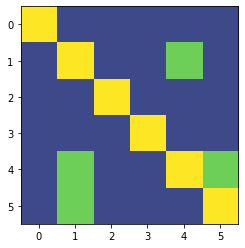

In [45]:
for twelveset in setsof12buildMoreThan24:
    n = NumberBuildable4SetTwelveCubes(twelveset, C36)
    if n>25:
        DisplaySetCubesandBuildableTargets(CubeCornersToNames(twelveset, C36), C36)

In [40]:
#All of these sets of 12 build more than 24 cubes.  I will sort them by #buildable 25, 26, or 27 
#still no examples of 12 found that build 28,29,or 30 targets (except 3 known min universals)

#build 25 targets
Set12_01 = [[235, 345, 154, 125, 162, 146, 364, 263], [152, 145, 354, 253, 236, 346, 164, 126], [124, 152, 253, 234, 364, 356, 165, 146], [245, 354, 153, 125, 162, 136, 346, 264], [153, 132, 124, 145, 465, 264, 236, 356], [154, 143, 132, 125, 265, 236, 346, 456], [152, 123, 134, 145, 465, 364, 263, 256], [123, 253, 354, 134, 146, 456, 265, 162], [152, 135, 345, 254, 246, 364, 163, 126], [243, 235, 125, 142, 164, 156, 365, 346], [245, 125, 132, 234, 364, 163, 156, 465], [153, 134, 142, 125, 265, 246, 364, 356]]
Set12_02 = [[235, 153, 145, 254, 246, 164, 136, 263], [245, 154, 135, 253, 236, 163, 146, 264], [243, 123, 152, 254, 456, 165, 136, 346], [243, 235, 125, 142, 164, 156, 365, 346], [152, 135, 345, 254, 246, 364, 163, 126], [143, 234, 253, 135, 156, 265, 246, 164], [153, 354, 234, 132, 126, 246, 456, 165], [143, 124, 254, 345, 356, 265, 162, 136], [245, 125, 132, 234, 364, 163, 156, 465], [243, 254, 145, 134, 163, 156, 265, 236], [124, 132, 235, 254, 456, 365, 163, 146], [354, 245, 142, 134, 163, 126, 256, 365]]
Set12_03 = [[143, 124, 254, 345, 356, 265, 162, 136], [152, 123, 134, 145, 465, 364, 263, 256], [154, 142, 123, 135, 365, 263, 246, 456], [154, 143, 132, 125, 265, 236, 346, 456], [354, 145, 124, 234, 263, 162, 156, 365], [245, 253, 123, 142, 164, 136, 356, 465], [354, 245, 142, 134, 163, 126, 256, 365], [153, 235, 243, 134, 146, 264, 256, 165], [245, 154, 135, 253, 236, 163, 146, 264], [243, 254, 145, 134, 163, 156, 265, 236], [245, 125, 132, 234, 364, 163, 156, 465], [235, 153, 145, 254, 246, 164, 136, 263]]
Set12_04 = [[243, 254, 145, 134, 163, 156, 265, 236], [153, 134, 142, 125, 265, 246, 364, 356], [354, 245, 142, 134, 163, 126, 256, 365], [154, 142, 123, 135, 365, 263, 246, 456], [123, 243, 345, 135, 156, 465, 264, 162], [154, 143, 132, 125, 265, 236, 346, 456], [143, 345, 235, 132, 126, 256, 465, 164], [153, 235, 243, 134, 146, 264, 256, 165], [143, 124, 254, 345, 356, 265, 162, 136], [152, 145, 354, 253, 236, 346, 164, 126], [235, 153, 145, 254, 246, 164, 136, 263], [143, 154, 245, 234, 263, 256, 165, 136]]
Set12_05 = [[143, 124, 254, 345, 356, 265, 162, 136], [235, 153, 145, 254, 246, 164, 136, 263], [245, 354, 153, 125, 162, 136, 346, 264], [143, 154, 245, 234, 263, 256, 165, 136], [152, 145, 354, 253, 236, 346, 164, 126], [153, 235, 243, 134, 146, 264, 256, 165], [243, 123, 152, 254, 456, 165, 136, 346], [154, 142, 123, 135, 365, 263, 246, 456], [245, 154, 135, 253, 236, 163, 146, 264], [143, 345, 235, 132, 126, 256, 465, 164], [245, 125, 132, 234, 364, 163, 156, 465], [124, 132, 235, 254, 456, 365, 163, 146]]
Set12_06 = [[245, 154, 135, 253, 236, 163, 146, 264], [143, 234, 253, 135, 156, 265, 246, 164], [235, 153, 145, 254, 246, 164, 136, 263], [245, 253, 123, 142, 164, 136, 356, 465], [153, 354, 234, 132, 126, 246, 456, 165], [143, 345, 235, 132, 126, 256, 465, 164], [123, 253, 354, 134, 146, 456, 265, 162], [243, 235, 125, 142, 164, 156, 365, 346], [245, 354, 153, 125, 162, 136, 346, 264], [152, 145, 354, 253, 236, 346, 164, 126], [124, 152, 253, 234, 364, 356, 165, 146], [154, 142, 123, 135, 365, 263, 246, 456]]
Set12_07 = [[153, 134, 142, 125, 265, 246, 364, 356], [143, 345, 235, 132, 126, 256, 465, 164], [245, 125, 132, 234, 364, 163, 156, 465], [354, 145, 124, 234, 263, 162, 156, 365], [123, 253, 354, 134, 146, 456, 265, 162], [153, 235, 243, 134, 146, 264, 256, 165], [154, 142, 123, 135, 365, 263, 246, 456], [243, 123, 152, 254, 456, 165, 136, 346], [124, 132, 235, 254, 456, 365, 163, 146], [243, 235, 125, 142, 164, 156, 365, 346], [243, 142, 154, 345, 356, 165, 126, 236], [143, 124, 254, 345, 356, 265, 162, 136]]
Set12_08 = [[152, 124, 143, 135, 365, 346, 264, 256], [235, 153, 145, 254, 246, 164, 136, 263], [245, 125, 132, 234, 364, 163, 156, 465], [354, 145, 124, 234, 263, 162, 156, 365], [243, 235, 125, 142, 164, 156, 365, 346], [235, 345, 154, 125, 162, 146, 364, 263], [152, 135, 345, 254, 246, 364, 163, 126], [124, 152, 253, 234, 364, 356, 165, 146], [243, 142, 154, 345, 356, 165, 126, 236], [123, 243, 345, 135, 156, 465, 264, 162], [154, 143, 132, 125, 265, 236, 346, 456], [153, 235, 243, 134, 146, 264, 256, 165]]
Set12_11 = [[123, 243, 345, 135, 156, 465, 264, 162], [152, 123, 134, 145, 465, 364, 263, 256], [153, 354, 234, 132, 126, 246, 456, 165], [245, 154, 135, 253, 236, 163, 146, 264], [354, 145, 124, 234, 263, 162, 156, 365], [243, 123, 152, 254, 456, 165, 136, 346], [245, 354, 153, 125, 162, 136, 346, 264], [235, 345, 154, 125, 162, 146, 364, 263], [153, 134, 142, 125, 265, 246, 364, 356], [235, 153, 145, 254, 246, 164, 136, 263], [124, 152, 253, 234, 364, 356, 165, 146], [154, 143, 132, 125, 265, 236, 346, 456]]
Set12_12 = [[154, 143, 132, 125, 265, 236, 346, 456], [354, 145, 124, 234, 263, 162, 156, 365], [153, 235, 243, 134, 146, 264, 256, 165], [152, 135, 345, 254, 246, 364, 163, 126], [143, 154, 245, 234, 263, 256, 165, 136], [152, 123, 134, 145, 465, 364, 263, 256], [235, 153, 145, 254, 246, 164, 136, 263], [354, 245, 142, 134, 163, 126, 256, 365], [123, 243, 345, 135, 156, 465, 264, 162], [123, 253, 354, 134, 146, 456, 265, 162], [235, 345, 154, 125, 162, 146, 364, 263], [245, 253, 123, 142, 164, 136, 356, 465]]
Set12_13 = [[153, 134, 142, 125, 265, 246, 364, 356], [152, 145, 354, 253, 236, 346, 164, 126], [243, 254, 145, 134, 163, 156, 265, 236], [154, 143, 132, 125, 265, 236, 346, 456], [152, 124, 143, 135, 365, 346, 264, 256], [235, 345, 154, 125, 162, 146, 364, 263], [143, 154, 245, 234, 263, 256, 165, 136], [143, 234, 253, 135, 156, 265, 246, 164], [123, 253, 354, 134, 146, 456, 265, 162], [235, 153, 145, 254, 246, 164, 136, 263], [245, 253, 123, 142, 164, 136, 356, 465], [354, 245, 142, 134, 163, 126, 256, 365]]
Set12_14 = [[123, 243, 345, 135, 156, 465, 264, 162], [245, 125, 132, 234, 364, 163, 156, 465], [124, 152, 253, 234, 364, 356, 165, 146], [124, 132, 235, 254, 456, 365, 163, 146], [235, 153, 145, 254, 246, 164, 136, 263], [143, 124, 254, 345, 356, 265, 162, 136], [245, 154, 135, 253, 236, 163, 146, 264], [354, 245, 142, 134, 163, 126, 256, 365], [243, 142, 154, 345, 356, 165, 126, 236], [245, 354, 153, 125, 162, 136, 346, 264], [152, 145, 354, 253, 236, 346, 164, 126], [243, 254, 145, 134, 163, 156, 265, 236]]
Set12_15 = [[243, 142, 154, 345, 356, 165, 126, 236], [354, 145, 124, 234, 263, 162, 156, 365], [152, 135, 345, 254, 246, 364, 163, 126], [243, 235, 125, 142, 164, 156, 365, 346], [245, 125, 132, 234, 364, 163, 156, 465], [243, 123, 152, 254, 456, 165, 136, 346], [245, 154, 135, 253, 236, 163, 146, 264], [235, 153, 145, 254, 246, 164, 136, 263], [123, 243, 345, 135, 156, 465, 264, 162], [143, 154, 245, 234, 263, 256, 165, 136], [354, 245, 142, 134, 163, 126, 256, 365], [123, 253, 354, 134, 146, 456, 265, 162]]
Set12_16 = [[245, 125, 132, 234, 364, 163, 156, 465], [124, 152, 253, 234, 364, 356, 165, 146], [153, 134, 142, 125, 265, 246, 364, 356], [243, 235, 125, 142, 164, 156, 365, 346], [153, 132, 124, 145, 465, 264, 236, 356], [235, 345, 154, 125, 162, 146, 364, 263], [152, 124, 143, 135, 365, 346, 264, 256], [123, 253, 354, 134, 146, 456, 265, 162], [152, 135, 345, 254, 246, 364, 163, 126], [124, 132, 235, 254, 456, 365, 163, 146], [235, 153, 145, 254, 246, 164, 136, 263], [245, 354, 153, 125, 162, 136, 346, 264]]
Set12_18 = [[153, 235, 243, 134, 146, 264, 256, 165], [243, 254, 145, 134, 163, 156, 265, 236], [152, 123, 134, 145, 465, 364, 263, 256], [243, 142, 154, 345, 356, 165, 126, 236], [143, 345, 235, 132, 126, 256, 465, 164], [354, 145, 124, 234, 263, 162, 156, 365], [245, 154, 135, 253, 236, 163, 146, 264], [153, 134, 142, 125, 265, 246, 364, 356], [245, 253, 123, 142, 164, 136, 356, 465], [153, 354, 234, 132, 126, 246, 456, 165], [143, 124, 254, 345, 356, 265, 162, 136], [152, 124, 143, 135, 365, 346, 264, 256]]
Set12_20 = [[245, 354, 153, 125, 162, 136, 346, 264], [143, 154, 245, 234, 263, 256, 165, 136], [153, 134, 142, 125, 265, 246, 364, 356], [124, 132, 235, 254, 456, 365, 163, 146], [354, 245, 142, 134, 163, 126, 256, 365], [245, 125, 132, 234, 364, 163, 156, 465], [243, 123, 152, 254, 456, 165, 136, 346], [152, 135, 345, 254, 246, 364, 163, 126], [245, 253, 123, 142, 164, 136, 356, 465], [235, 345, 154, 125, 162, 146, 364, 263], [245, 154, 135, 253, 236, 163, 146, 264], [153, 132, 124, 145, 465, 264, 236, 356]]
Set12_21 = [[245, 354, 153, 125, 162, 136, 346, 264], [235, 345, 154, 125, 162, 146, 364, 263], [245, 125, 132, 234, 364, 163, 156, 465], [143, 234, 253, 135, 156, 265, 246, 164], [235, 153, 145, 254, 246, 164, 136, 263], [124, 152, 253, 234, 364, 356, 165, 146], [152, 124, 143, 135, 365, 346, 264, 256], [152, 123, 134, 145, 465, 364, 263, 256], [153, 134, 142, 125, 265, 246, 364, 356], [153, 354, 234, 132, 126, 246, 456, 165], [154, 142, 123, 135, 365, 263, 246, 456], [243, 142, 154, 345, 356, 165, 126, 236]]
Set12_22 = [[143, 234, 253, 135, 156, 265, 246, 164], [152, 124, 143, 135, 365, 346, 264, 256], [154, 142, 123, 135, 365, 263, 246, 456], [153, 354, 234, 132, 126, 246, 456, 165], [243, 254, 145, 134, 163, 156, 265, 236], [143, 154, 245, 234, 263, 256, 165, 136], [123, 243, 345, 135, 156, 465, 264, 162], [243, 142, 154, 345, 356, 165, 126, 236], [354, 245, 142, 134, 163, 126, 256, 365], [243, 235, 125, 142, 164, 156, 365, 346], [235, 345, 154, 125, 162, 146, 364, 263], [243, 123, 152, 254, 456, 165, 136, 346]]
Set12_23 = [[153, 132, 124, 145, 465, 264, 236, 356], [143, 345, 235, 132, 126, 256, 465, 164], [123, 253, 354, 134, 146, 456, 265, 162], [152, 123, 134, 145, 465, 364, 263, 256], [143, 154, 245, 234, 263, 256, 165, 136], [243, 235, 125, 142, 164, 156, 365, 346], [354, 245, 142, 134, 163, 126, 256, 365], [124, 152, 253, 234, 364, 356, 165, 146], [152, 124, 143, 135, 365, 346, 264, 256], [153, 134, 142, 125, 265, 246, 364, 356], [243, 123, 152, 254, 456, 165, 136, 346], [152, 135, 345, 254, 246, 364, 163, 126]]
Set12_24 = [[123, 243, 345, 135, 156, 465, 264, 162], [235, 345, 154, 125, 162, 146, 364, 263], [154, 142, 123, 135, 365, 263, 246, 456], [154, 143, 132, 125, 265, 236, 346, 456], [235, 153, 145, 254, 246, 164, 136, 263], [152, 124, 143, 135, 365, 346, 264, 256], [124, 152, 253, 234, 364, 356, 165, 146], [123, 253, 354, 134, 146, 456, 265, 162], [354, 245, 142, 134, 163, 126, 256, 365], [153, 132, 124, 145, 465, 264, 236, 356], [243, 123, 152, 254, 456, 165, 136, 346], [245, 125, 132, 234, 364, 163, 156, 465]]
Set12_25 = [[154, 143, 132, 125, 265, 236, 346, 456], [245, 125, 132, 234, 364, 163, 156, 465], [152, 145, 354, 253, 236, 346, 164, 126], [154, 142, 123, 135, 365, 263, 246, 456], [243, 123, 152, 254, 456, 165, 136, 346], [153, 132, 124, 145, 465, 264, 236, 356], [123, 253, 354, 134, 146, 456, 265, 162], [152, 135, 345, 254, 246, 364, 163, 126], [124, 132, 235, 254, 456, 365, 163, 146], [123, 243, 345, 135, 156, 465, 264, 162], [153, 134, 142, 125, 265, 246, 364, 356], [153, 235, 243, 134, 146, 264, 256, 165]]
Set12_26 = [[143, 124, 254, 345, 356, 265, 162, 136], [123, 243, 345, 135, 156, 465, 264, 162], [245, 154, 135, 253, 236, 163, 146, 264], [152, 145, 354, 253, 236, 346, 164, 126], [243, 142, 154, 345, 356, 165, 126, 236], [235, 345, 154, 125, 162, 146, 364, 263], [153, 235, 243, 134, 146, 264, 256, 165], [124, 132, 235, 254, 456, 365, 163, 146], [143, 345, 235, 132, 126, 256, 465, 164], [243, 235, 125, 142, 164, 156, 365, 346], [143, 154, 245, 234, 263, 256, 165, 136], [153, 354, 234, 132, 126, 246, 456, 165]]
Set12_27 = [[124, 152, 253, 234, 364, 356, 165, 146], [354, 245, 142, 134, 163, 126, 256, 365], [124, 132, 235, 254, 456, 365, 163, 146], [235, 153, 145, 254, 246, 164, 136, 263], [152, 124, 143, 135, 365, 346, 264, 256], [245, 253, 123, 142, 164, 136, 356, 465], [154, 142, 123, 135, 365, 263, 246, 456], [245, 354, 153, 125, 162, 136, 346, 264], [243, 254, 145, 134, 163, 156, 265, 236], [143, 345, 235, 132, 126, 256, 465, 164], [143, 234, 253, 135, 156, 265, 246, 164], [243, 235, 125, 142, 164, 156, 365, 346]]
Set12_28 = [[152, 124, 143, 135, 365, 346, 264, 256], [152, 145, 354, 253, 236, 346, 164, 126], [245, 253, 123, 142, 164, 136, 356, 465], [245, 125, 132, 234, 364, 163, 156, 465], [123, 253, 354, 134, 146, 456, 265, 162], [245, 354, 153, 125, 162, 136, 346, 264], [154, 142, 123, 135, 365, 263, 246, 456], [235, 153, 145, 254, 246, 164, 136, 263], [152, 135, 345, 254, 246, 364, 163, 126], [153, 235, 243, 134, 146, 264, 256, 165], [143, 124, 254, 345, 356, 265, 162, 136], [143, 234, 253, 135, 156, 265, 246, 164]]
Set12_29 = [[124, 152, 253, 234, 364, 356, 165, 146], [143, 124, 254, 345, 356, 265, 162, 136], [243, 123, 152, 254, 456, 165, 136, 346], [354, 145, 124, 234, 263, 162, 156, 365], [153, 132, 124, 145, 465, 264, 236, 356], [153, 235, 243, 134, 146, 264, 256, 165], [243, 254, 145, 134, 163, 156, 265, 236], [243, 235, 125, 142, 164, 156, 365, 346], [152, 135, 345, 254, 246, 364, 163, 126], [245, 125, 132, 234, 364, 163, 156, 465], [154, 142, 123, 135, 365, 263, 246, 456], [245, 253, 123, 142, 164, 136, 356, 465]]
Set12_30 = [[354, 245, 142, 134, 163, 126, 256, 365], [245, 125, 132, 234, 364, 163, 156, 465], [123, 253, 354, 134, 146, 456, 265, 162], [243, 235, 125, 142, 164, 156, 365, 346], [245, 154, 135, 253, 236, 163, 146, 264], [143, 234, 253, 135, 156, 265, 246, 164], [245, 253, 123, 142, 164, 136, 356, 465], [153, 132, 124, 145, 465, 264, 236, 356], [235, 345, 154, 125, 162, 146, 364, 263], [152, 135, 345, 254, 246, 364, 163, 126], [243, 123, 152, 254, 456, 165, 136, 346], [354, 145, 124, 234, 263, 162, 156, 365]]
Set12_31 = [[143, 345, 235, 132, 126, 256, 465, 164], [124, 152, 253, 234, 364, 356, 165, 146], [153, 134, 142, 125, 265, 246, 364, 356], [123, 243, 345, 135, 156, 465, 264, 162], [143, 124, 254, 345, 356, 265, 162, 136], [354, 145, 124, 234, 263, 162, 156, 365], [245, 354, 153, 125, 162, 136, 346, 264], [243, 254, 145, 134, 163, 156, 265, 236], [124, 132, 235, 254, 456, 365, 163, 146], [153, 354, 234, 132, 126, 246, 456, 165], [243, 123, 152, 254, 456, 165, 136, 346], [245, 154, 135, 253, 236, 163, 146, 264]]

#build 26 targets
Set12_09 = [[235, 345, 154, 125, 162, 146, 364, 263], [152, 123, 134, 145, 465, 364, 263, 256], [154, 142, 123, 135, 365, 263, 246, 456], [245, 154, 135, 253, 236, 163, 146, 264], [143, 234, 253, 135, 156, 265, 246, 164], [354, 245, 142, 134, 163, 126, 256, 365], [153, 132, 124, 145, 465, 264, 236, 356], [354, 145, 124, 234, 263, 162, 156, 365], [154, 143, 132, 125, 265, 236, 346, 456], [243, 123, 152, 254, 456, 165, 136, 346], [243, 142, 154, 345, 356, 165, 126, 236], [235, 153, 145, 254, 246, 164, 136, 263]]
Set12_10 = [[153, 235, 243, 134, 146, 264, 256, 165], [153, 132, 124, 145, 465, 264, 236, 356], [143, 154, 245, 234, 263, 256, 165, 136], [245, 253, 123, 142, 164, 136, 356, 465], [245, 125, 132, 234, 364, 163, 156, 465], [123, 243, 345, 135, 156, 465, 264, 162], [243, 123, 152, 254, 456, 165, 136, 346], [153, 354, 234, 132, 126, 246, 456, 165], [245, 154, 135, 253, 236, 163, 146, 264], [243, 235, 125, 142, 164, 156, 365, 346], [123, 253, 354, 134, 146, 456, 265, 162], [152, 123, 134, 145, 465, 364, 263, 256]]
Set12_17 = [[143, 234, 253, 135, 156, 265, 246, 164], [153, 235, 243, 134, 146, 264, 256, 165], [243, 254, 145, 134, 163, 156, 265, 236], [124, 152, 253, 234, 364, 356, 165, 146], [143, 154, 245, 234, 263, 256, 165, 136], [152, 124, 143, 135, 365, 346, 264, 256], [354, 245, 142, 134, 163, 126, 256, 365], [143, 345, 235, 132, 126, 256, 465, 164], [154, 143, 132, 125, 265, 236, 346, 456], [143, 124, 254, 345, 356, 265, 162, 136], [123, 253, 354, 134, 146, 456, 265, 162], [152, 123, 134, 145, 465, 364, 263, 256]]
Set12_32 = [[124, 152, 253, 234, 364, 356, 165, 146], [154, 142, 123, 135, 365, 263, 246, 456], [153, 132, 124, 145, 465, 264, 236, 356], [243, 123, 152, 254, 456, 165, 136, 346], [143, 154, 245, 234, 263, 256, 165, 136], [152, 124, 143, 135, 365, 346, 264, 256], [243, 142, 154, 345, 356, 165, 126, 236], [243, 254, 145, 134, 163, 156, 265, 236], [354, 145, 124, 234, 263, 162, 156, 365], [153, 134, 142, 125, 265, 246, 364, 356], [235, 345, 154, 125, 162, 146, 364, 263], [245, 253, 123, 142, 164, 136, 356, 465]]

#build 27 targets
Set12_19 = [[152, 145, 354, 253, 236, 346, 164, 126], [235, 153, 145, 254, 246, 164, 136, 263], [354, 145, 124, 234, 263, 162, 156, 365], [235, 345, 154, 125, 162, 146, 364, 263], [243, 254, 145, 134, 163, 156, 265, 236], [153, 132, 124, 145, 465, 264, 236, 356], [154, 142, 123, 135, 365, 263, 246, 456], [152, 124, 143, 135, 365, 346, 264, 256], [143, 154, 245, 234, 263, 256, 165, 136], [354, 245, 142, 134, 163, 126, 256, 365], [152, 123, 134, 145, 465, 364, 263, 256], [143, 124, 254, 345, 356, 265, 162, 136]]

#27 :  1
#26 :  4
#25 :  27

In [43]:
# Sample list of data
my_list = ["item1", "item2", "item3", "item4"]
 
# Specify the file path
file_path = "main.txt"
 
# Using "with open" syntax to automatically close the file
with open(file_path, 'w') as file:
    # Join the list elements into a single string with a newline character
    data_to_write = '\n'.join(my_list)
     
    # Write the data to the file
    file.write(data_to_write)
 
print(f"The list has been written to {file_path}.")
print(my_list)

The list has been written to main.txt.
['item1', 'item2', 'item3', 'item4']


these 26 cubes are Buildable:
['123.456', '123.465', '123.546', '123.564', '123.645', '123.654', '124.356', '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.463', '125.634', '125.643', '126.345', '126.354', '126.435', '126.534', '126.543', '134.625', '135.426', '135.624', '136.425', '136.524']
the original set of cubes


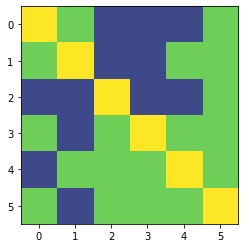

the set of buildable targets


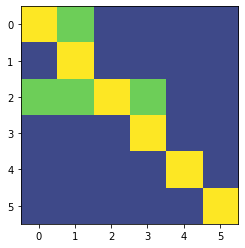

In [39]:
DisplaySetCubesandBuildableTargets(CubeCornersToNames(Set12_32, C36), C36)

## How many sets of 12 can build all 30 targets?  What do they look like?

Idea: Are the sets of 12 that build all 30